In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.ndim

2

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isna().sum()/len(df)*100

,0
tweet_id,0.000000
airline_sentiment,0.000000
airline_sentiment_confidence,0.000000
negativereason,37.308743
negativereason_confidence,28.128415
airline,0.000000
airline_sentiment_gold,99.726776
name,0.000000
negativereason_gold,99.781421
retweet_count,0.000000


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.drop('airline_sentiment_gold',axis = 1,inplace = True)
df.drop('negativereason_gold',axis = 1,inplace = True)
df.drop('tweet_coord',axis = 1, inplace = True)

In [ ]:
df['negativereason'] = df['negativereason'].fillna('Others')
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(df['negativereason_confidence'].mean())

In [ ]:
df['tweet_location'].fillna('No location',inplace = True)
df['user_timezone'].fillna('No Timezone',inplace = True)

/tmp/ipython-input-363-1558427385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet_location'].fillna('No location',inplace = True)
/tmp/ipython-input-363-1558427385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
df[['Sub_airline', 'Comments']] = df['text'].str.split(' ', n=1, expand=True)
correct_air = df['Sub_airline'] == df['airline']
correct_air.value_counts()

,count
False,14604


In [ ]:
df.drop('text',axis = 1, inplace = True)
df.drop('Sub_airline',axis = 1, inplace = True)
df.drop('Comments',axis = 1, inplace = True)

In [ ]:
df.isna().sum()/len(df)*100

,0
tweet_id,0.0
airline_sentiment,0.0
airline_sentiment_confidence,0.0
negativereason,0.0
negativereason_confidence,0.0
airline,0.0
name,0.0
retweet_count,0.0
tweet_created,0.0
tweet_location,0.0


In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.460400e+04,14604.000000,14604.000000,14604.000000
mean,5.692157e+17,0.899923,0.637644,0.082786
std,7.782567e+14,0.162955,0.280174,0.746647
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685581e+17,0.692300,0.637644,0.000000
50%,5.694728e+17,1.000000,0.637644,0.000000
75%,5.698885e+17,1.000000,0.703000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Others,0.637644,Virgin America,cairdin,0,2015-02-24 11:35:52 -0800,No location,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Others,0.000000,Virgin America,jnardino,0,2015-02-24 11:15:59 -0800,No location,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Others,0.637644,Virgin America,yvonnalynn,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,2015-02-24 11:15:36 -0800,No location,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,2015-02-24 11:14:45 -0800,No location,Pacific Time (US & Canada)


1. Customer Loyalty & Retention

In [393]:
pd.crosstab(df['airline'],df['negativereason'])

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


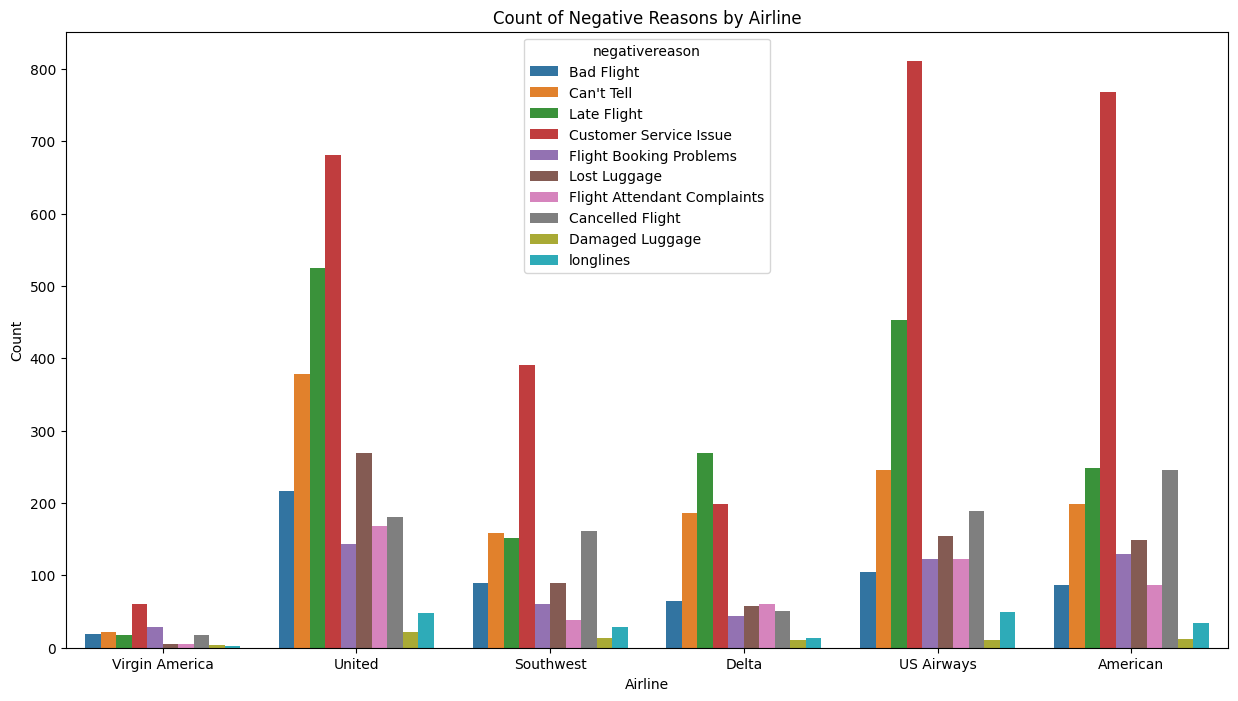

In [394]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x = 'airline',hue = 'negativereason',data = df)
plt.title('Count of Negative Reasons by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

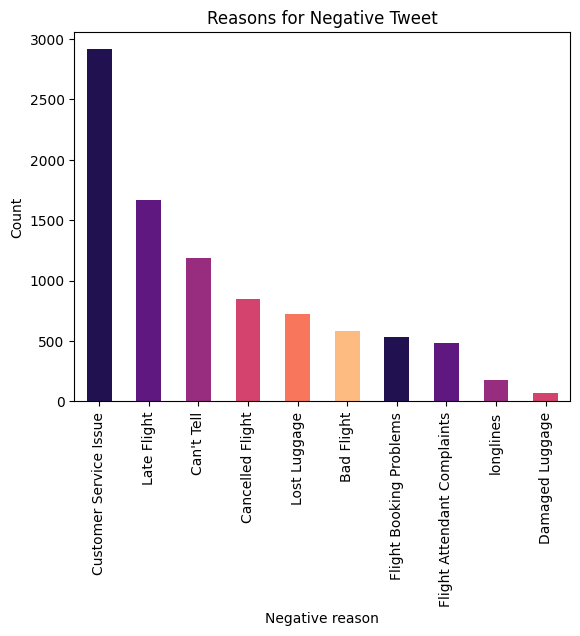

                negativereason  count
0       Customer Service Issue   2910
1                  Late Flight   1665
2                   Can't Tell   1190
3             Cancelled Flight    847
4                 Lost Luggage    724
5                   Bad Flight    580
6      Flight Booking Problems    529
7  Flight Attendant Complaints    481
8                    longlines    178
9              Damaged Luggage     74


In [399]:
df['negativereason'].value_counts().plot(kind = 'bar',color = sns.color_palette('magma'))
plt.title('Reasons for Negative Tweet')
plt.xlabel('Negative reason')
plt.ylabel('Count')
plt.show()
print(df['negativereason'].value_counts().reset_index())

Airline with highest proportion of positive tweets: Virgin America
Airline with highest proportion of negative tweets: US Airways

Proportion of sentiments per airline:
airline_sentiment         airline   negative    neutral   positive
0                        American  71.281675  16.709512  12.008814
1                           Delta  42.979298  32.538254  24.482448
2                       Southwest  49.008264  27.438017  23.553719
3                      US Airways  77.686234  13.079300   9.234466
4                          United  68.890633  18.236525  12.872841
5                  Virgin America  35.912698  33.928571  30.158730


<Figure size 1500x800 with 0 Axes>

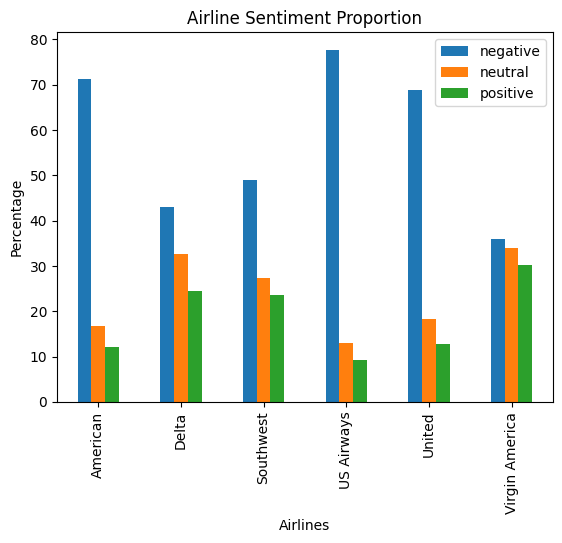

In [ ]:
airline_sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
airline_sentiment_proportions = airline_sentiment_counts.apply(lambda x: x / x.sum()*100, axis=1)

# Highest proportion of positive sentiment tweets
most_positive_airline = airline_sentiment_proportions['positive'].idxmax()
print(f"Airline with highest proportion of positive tweets: {most_positive_airline}")

# Highest proportion of negative sentiment tweets
most_negative_airline = airline_sentiment_proportions['negative'].idxmax()
print(f"Airline with highest proportion of negative tweets: {most_negative_airline}")

# Optionally, display the full proportion table
print("\nProportion of sentiments per airline:")
print(airline_sentiment_proportions.reset_index())

figure=plt.figure(figsize=(15,8))
airline_sentiment_proportions.plot(kind = 'bar',color = sns.color_palette('tab10'))
plt.title('Airline Sentiment Proportion')
plt.xlabel('Airlines')
plt.xticks(rotation = 90)
plt.ylabel('Percentage')
plt.legend()
plt.show()

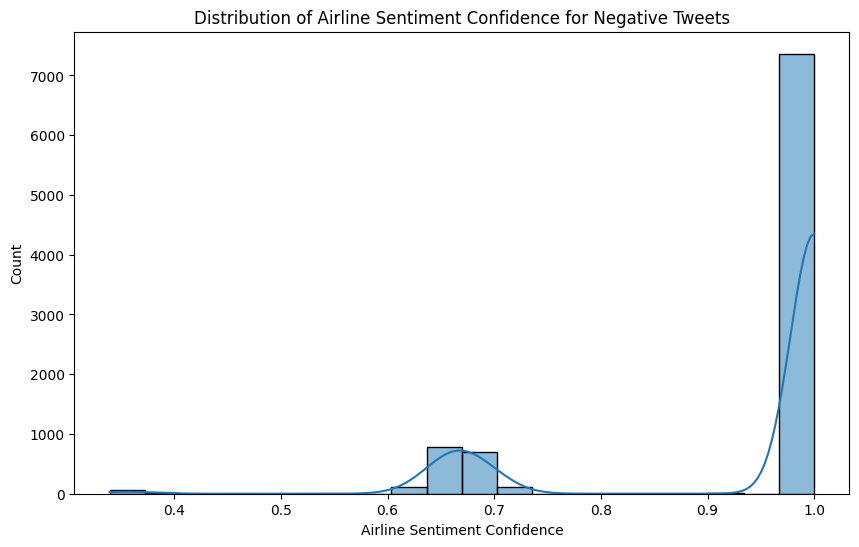


Correlation between airline_sentiment_confidence and likelihood of a tweet being negative: 0.265077558526453
There is a weak positive correlation, suggesting higher confidence might be slightly associated with negative tweets.

Mean Airline Sentiment Confidence by Sentiment
	


,airline_sentiment,airline_sentiment_confidence
0,negative,0.933227
1,neutral,0.822846
2,positive,0.871550


In [ ]:
#Is there a correlation between the airline_sentiment_confidence and the likelihood of a tweet being negative?

negative_tweets_df = df[df['airline_sentiment'] == 'negative']

# Plotting the distribution of airline_sentiment_confidence for negative tweets
plt.figure(figsize=(10, 6))
sns.histplot(negative_tweets_df['airline_sentiment_confidence'], bins=20, kde=True)
plt.title('Distribution of Airline Sentiment Confidence for Negative Tweets')
plt.xlabel('Airline Sentiment Confidence')
plt.ylabel('Count')
plt.show()

# Calculate the correlation between airline_sentiment_confidence and whether a tweet is negative
df['is_negative'] = (df['airline_sentiment'] == 'negative').astype(int)

# Calculating the correlation coefficient
correlation = df['airline_sentiment_confidence'].corr(df['is_negative'])
print(f"\nCorrelation between airline_sentiment_confidence and likelihood of a tweet being negative: {correlation}")

# Interpreting the correlation coefficient:
if correlation > 0.1:
  print("There is a weak positive correlation, suggesting higher confidence might be slightly associated with negative tweets.")
elif correlation < -0.1:
  print("There is a weak negative correlation, suggesting higher confidence might be slightly associated with non-negative tweets.")
else:
  print("There is a very weak or no linear correlation.")

# Also, we can look at the mean confidence for different sentiment categories
mean_confidence_by_sentiment = df.groupby('airline_sentiment')['airline_sentiment_confidence'].mean()
print("\nMean Airline Sentiment Confidence by Sentiment")
print('\t')
mean_confidence_by_sentiment.reset_index()

2. Demographic & Geographic Analysis

In [ ]:
location_sentiment = df.groupby(['tweet_location', 'airline_sentiment']).size().unstack(fill_value=0)
timezone_sentiment = df.groupby(['user_timezone', 'airline_sentiment']).size().unstack(fill_value=0)

min_tweets = 50
location_sentiment_filtered = location_sentiment[(location_sentiment['negative'] + location_sentiment['neutral'] + location_sentiment['positive']) >= min_tweets]
timezone_sentiment_filtered = timezone_sentiment[(timezone_sentiment['negative'] + timezone_sentiment['neutral'] + timezone_sentiment['positive']) >= min_tweets]

print("\nSentiment distribution by Tweet Location (filtered for locations with >= 50 tweets):")
print(location_sentiment_filtered)

print("\nSentiment distribution by User Timezone (filtered for timezones with >= 50 tweets):")
print(timezone_sentiment_filtered)



Sentiment distribution by Tweet Location (filtered for locations with >= 50 tweets):
airline_sentiment  negative  neutral  positive
tweet_location                                
Austin, TX               42       11        11
Boston                   34       19         9
Boston, MA              103       35        19
Brooklyn, NY             47       10         9
Chicago                  68       18        18
Chicago, IL              56       16         9
Dallas, TX               25       16        13
Los Angeles              39       11        14
Los Angeles, CA          62       16        18
NYC                      68       14        13
New York                 86       22        19
New York City            60       21        15
New York, NY             93       30        33
No location            3135      960       628
San Francisco            57       12        17
San Francisco, CA        63       15        13
USA                      33       74        18
Washington DC        

In [ ]:
location_sentiment_proportions = location_sentiment_filtered.apply(lambda x: x / x.sum()*100, axis=1)
timezone_sentiment_proportions = timezone_sentiment_filtered.apply(lambda x: x / x.sum()*100, axis=1)

print("\nProportion of Sentiment by Tweet Location (filtered):")
print(location_sentiment_proportions.sort_values(by='negative', ascending=False).head(10))
print(location_sentiment_proportions.sort_values(by='positive', ascending=False).head(10))
print('\n')
print("\nProportion of Sentiment by User Timezone (filtered):")
print(timezone_sentiment_proportions.sort_values(by='negative', ascending=False).head(10))
print(timezone_sentiment_proportions.sort_values(by='positive', ascending=False).head(10))


Proportion of Sentiment by Tweet Location (filtered):
airline_sentiment   negative    neutral   positive
tweet_location                                    
Washington DC      79.245283  11.320755   9.433962
Washington, DC     73.648649  10.135135  16.216216
NYC                71.578947  14.736842  13.684211
Brooklyn, NY       71.212121  15.151515  13.636364
San Francisco, CA  69.230769  16.483516  14.285714
Chicago, IL        69.135802  19.753086  11.111111
New York           67.716535  17.322835  14.960630
Washington, D.C.   66.666667  19.047619  14.285714
No location        66.377303  20.326064  13.296633
San Francisco      66.279070  13.953488  19.767442
airline_sentiment   negative    neutral   positive
tweet_location                                    
Dallas, TX         46.296296  29.629630  24.074074
Los Angeles        60.937500  17.187500  21.875000
New York, NY       59.615385  19.230769  21.153846
San Francisco      66.279070  13.953488  19.767442
Los Angeles, CA    64.58333

In [ ]:
location_negativereason = df.groupby(['tweet_location', 'negativereason']).size().unstack(fill_value=0)
timezone_negativereason = df.groupby(['user_timezone', 'negativereason']).size().unstack(fill_value=0)

min_negative_tweets_for_analysis = 50
location_negativereason_filtered = location_negativereason[location_negativereason.sum(axis=1) >= min_negative_tweets_for_analysis]
timezone_negativereason_filtered = timezone_negativereason[timezone_negativereason.sum(axis=1) >= min_negative_tweets_for_analysis]

print("\nDistribution of Negative Reasons by Tweet Location (filtered for locations with >= 50 negative tweets):")
print(location_negativereason_filtered.apply(lambda x: x / x.sum(), axis=1).head())

print("\nDistribution of Negative Reasons by User Timezone (filtered for timezones with >= 50 negative tweets):")
print(timezone_negativereason_filtered.apply(lambda x: x / x.sum(), axis=1).head())


Distribution of Negative Reasons by Tweet Location (filtered for locations with >= 50 negative tweets):
negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
tweet_location                                             
Austin, TX        0.046875    0.093750          0.046875   
Boston            0.032258    0.048387          0.032258   
Boston, MA        0.050955    0.082803          0.038217   
Brooklyn, NY      0.030303    0.075758          0.015152   
Chicago           0.067308    0.134615          0.028846   

negativereason  Customer Service Issue  Damaged Luggage  \
tweet_location                                            
Austin, TX                    0.265625         0.000000   
Boston                        0.177419         0.000000   
Boston, MA                    0.184713         0.012739   
Brooklyn, NY                  0.272727         0.000000   
Chicago                       0.153846         0.009615   

negativereason  Flight Attendant Complaints  Flight Booking 

In [ ]:
# To see if they vary significantly, we can look at the top reasons in different locations/timezones
print("\nTop negative reasons by location (showing top 5 locations by total negative tweets):")
for location in location_negativereason_filtered.sum(axis=1).sort_values(ascending=False).head(5).index:
  print(f"\nLocation: {location}")
  print(location_negativereason_filtered.loc[location].sort_values(ascending=False).head(5))

print("\nTop negative reasons by timezone (showing top 5 timezones by total negative tweets):")
for timezone in timezone_negativereason_filtered.sum(axis=1).sort_values(ascending=False).head(5).index:
  print(f"\nTimezone: {timezone}")
  print(timezone_negativereason_filtered.loc[timezone].sort_values(ascending=False).head(5))


Top negative reasons by location (showing top 5 locations by total negative tweets):

Location: No location
negativereason
Others                    1588
Customer Service Issue    1027
Late Flight                559
Can't Tell                 386
Cancelled Flight           321
Name: No location, dtype: int64

Location: Boston, MA
negativereason
Others                    54
Customer Service Issue    29
Late Flight               20
Can't Tell                13
Lost Luggage               9
Name: Boston, MA, dtype: int64

Location: New York, NY
negativereason
Others                    63
Customer Service Issue    21
Late Flight               19
Can't Tell                16
Lost Luggage              11
Name: New York, NY, dtype: int64

Location: Washington, DC
negativereason
Others                    39
Customer Service Issue    38
Late Flight               23
Cancelled Flight          16
Can't Tell                 9
Name: Washington, DC, dtype: int64

Location: New York
negativereason
Oth

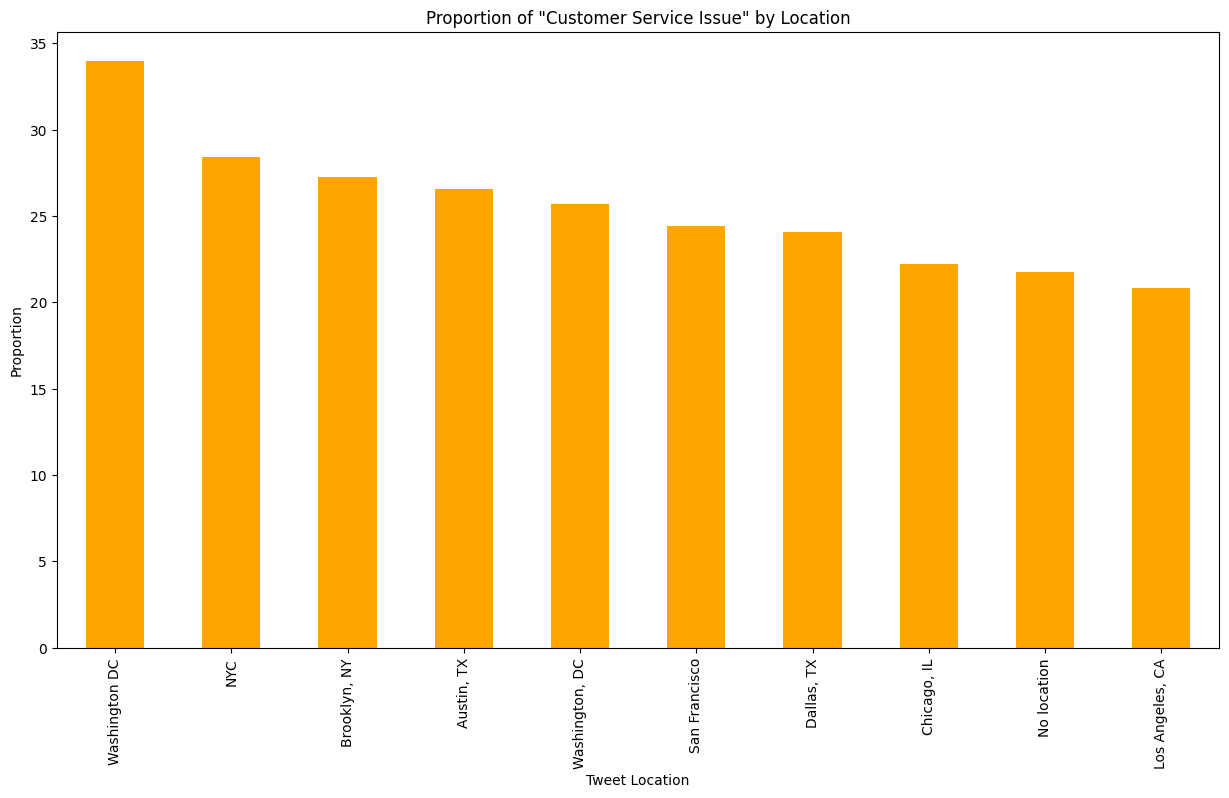

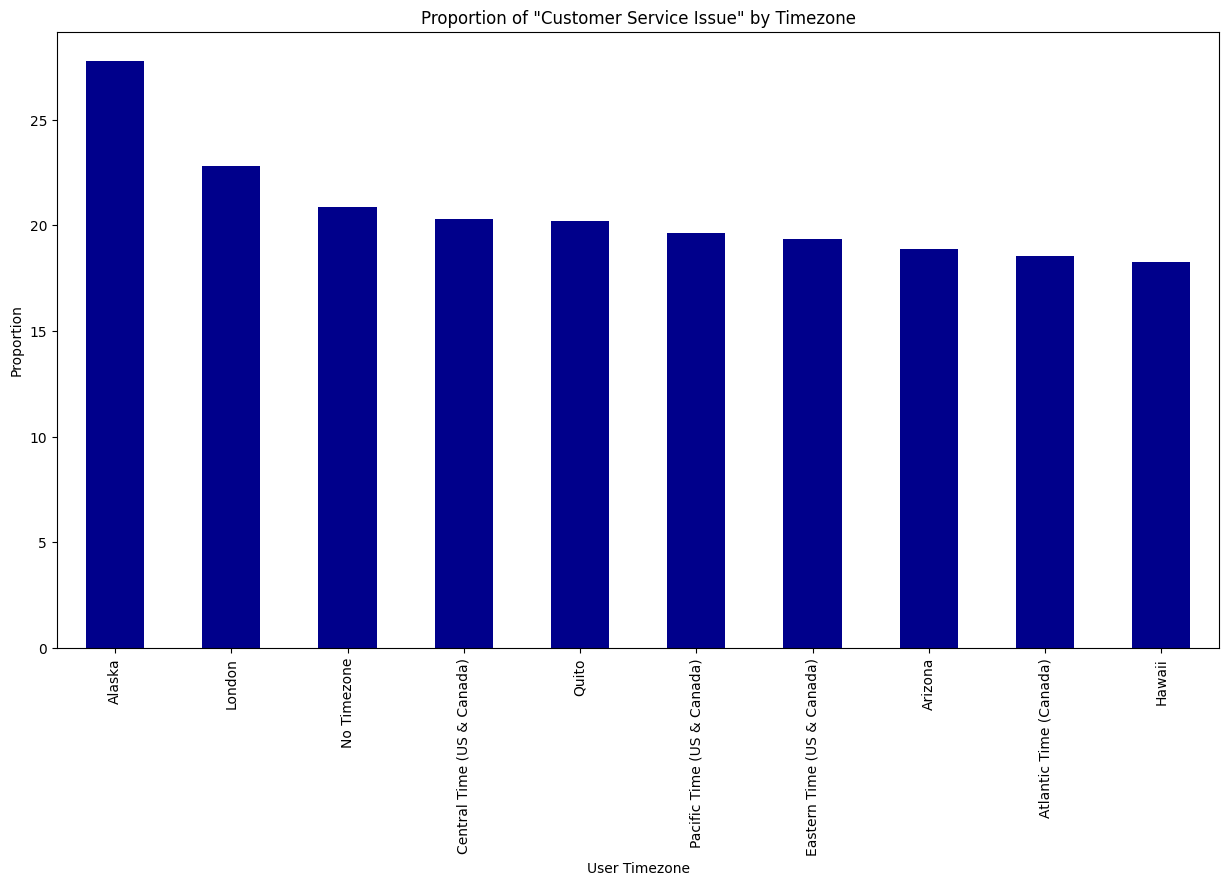

In [ ]:

negative_reason_to_compare = 'Customer Service Issue'
if negative_reason_to_compare in location_negativereason_filtered.columns:
  plt.figure(figsize=(15, 8))
  location_negativereason_filtered.apply(lambda x: x / x.sum()*100, axis=1)[negative_reason_to_compare].sort_values(ascending=False).head(10).plot(kind='bar',color = 'orange')
  plt.title(f'Proportion of "{negative_reason_to_compare}" by Location')
  plt.xlabel('Tweet Location')
  plt.ylabel('Proportion')
  plt.xticks(rotation=90)
  plt.show()

if negative_reason_to_compare in timezone_negativereason_filtered.columns:
  plt.figure(figsize=(15, 8))
  timezone_negativereason_filtered.apply(lambda x: x / x.sum()*100, axis=1)[negative_reason_to_compare].sort_values(ascending=False).head(10).plot(kind='bar',color = 'darkblue')
  plt.title(f'Proportion of "{negative_reason_to_compare}" by Timezone')
  plt.xlabel('User Timezone')
  plt.ylabel('Proportion')
  plt.xticks(rotation=90)
  plt.show()


Analyzing sentiment performance for American in specific locations:

Top 10 locations for American with highest positive sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Los Angeles        30.000000  65.000000   5.000000
Texas              28.571429  52.380952  19.047619
Chicago, IL        19.047619  66.666667  14.285714
San Diego          15.000000  60.000000  25.000000
Dallas, TX         15.000000  55.000000  30.000000
Los Angeles, CA    14.285714  65.714286  20.000000
Boston, MA         13.043478  56.521739  30.434783
New York, NY       12.820513  76.923077  10.256410
Chicago            12.000000  60.000000  28.000000
New York           10.000000  65.000000  25.000000

Top 10 locations for American with highest negative sentiment proportion:
airline_sentiment   positive    negative    neutral
tweet_location                                     
Pekin               0.000000  100.000000   0.000000
Washington, D

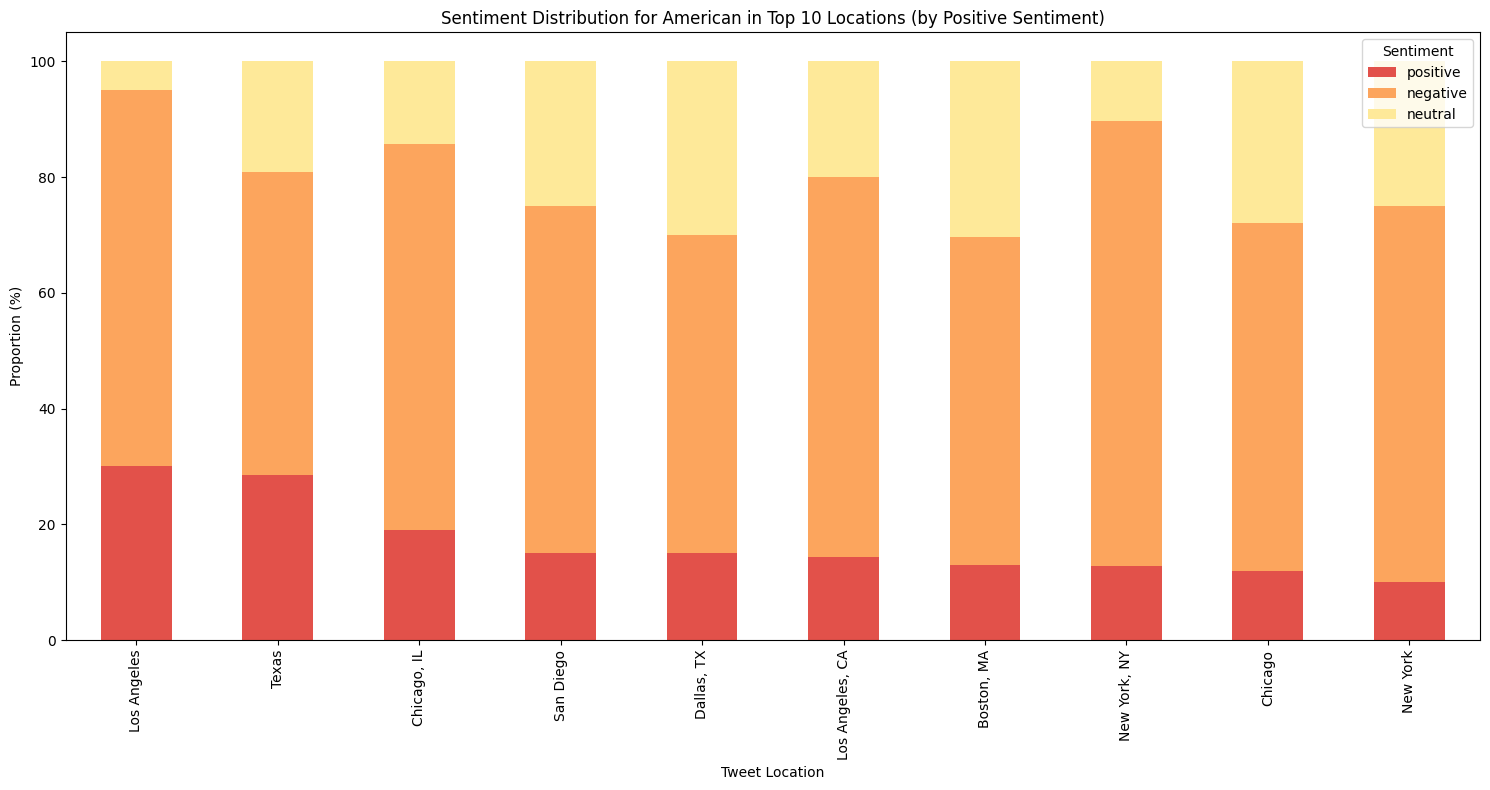

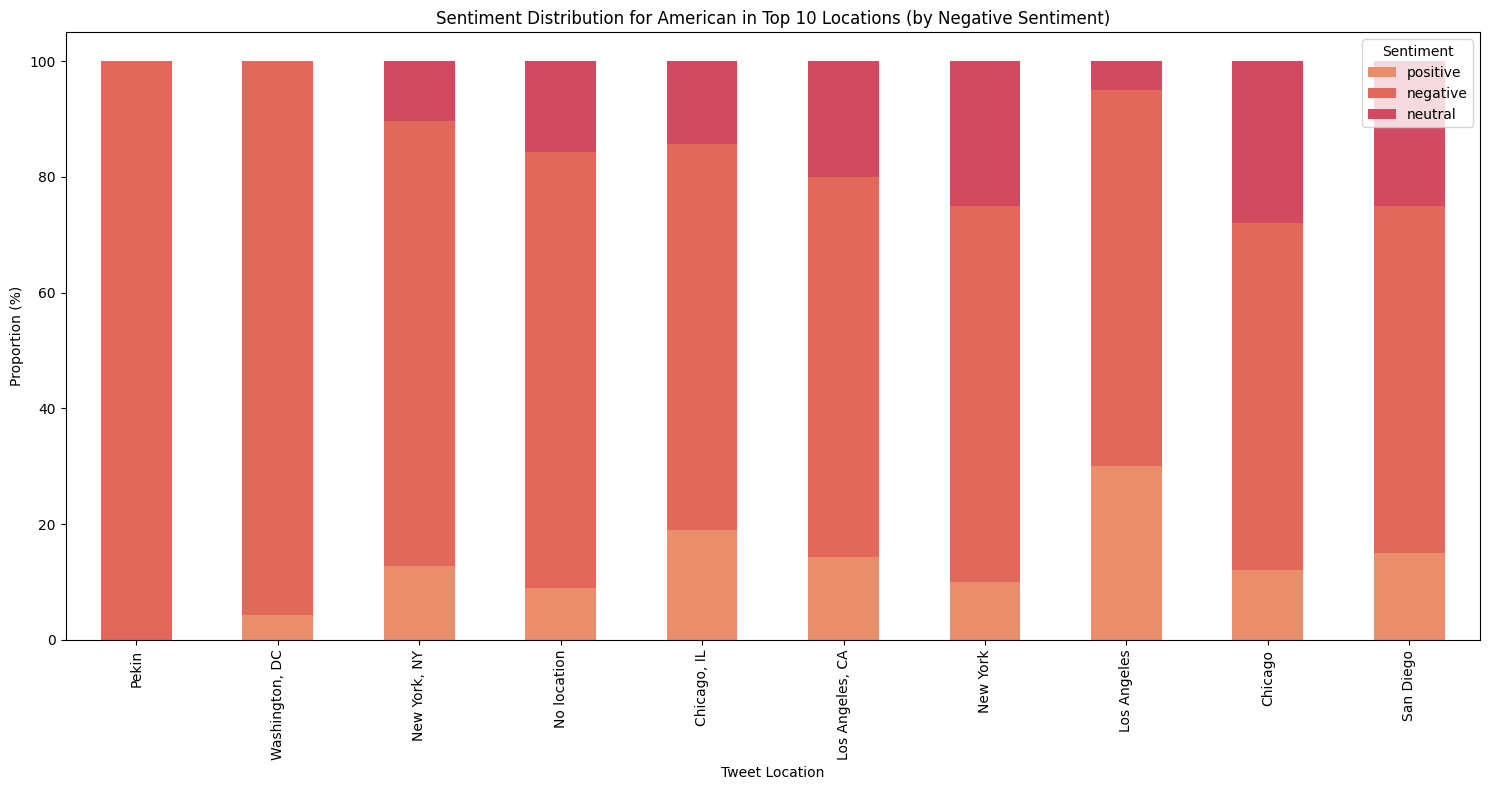


Analyzing sentiment performance for Delta in specific locations:

Top 10 locations for Delta with highest positive sentiment proportion:
airline_sentiment             positive   negative    neutral
tweet_location                                              
New York, NY                 37.037037  35.185185  27.777778
New York                     26.666667  55.555556  17.777778
Brooklyn, NY                 25.925926  51.851852  22.222222
Boston                       25.806452  45.161290  29.032258
NYC                          25.714286  48.571429  25.714286
Washington, DC               25.000000  54.166667  20.833333
No location                  22.330097  51.941748  25.728155
New York City                20.833333  52.083333  27.083333
Logan International Airport  18.750000  12.500000  68.750000
Boston, MA                   16.666667  51.851852  31.481481

Top 10 locations for Delta with highest negative sentiment proportion:
airline_sentiment             positive   negative    neutr

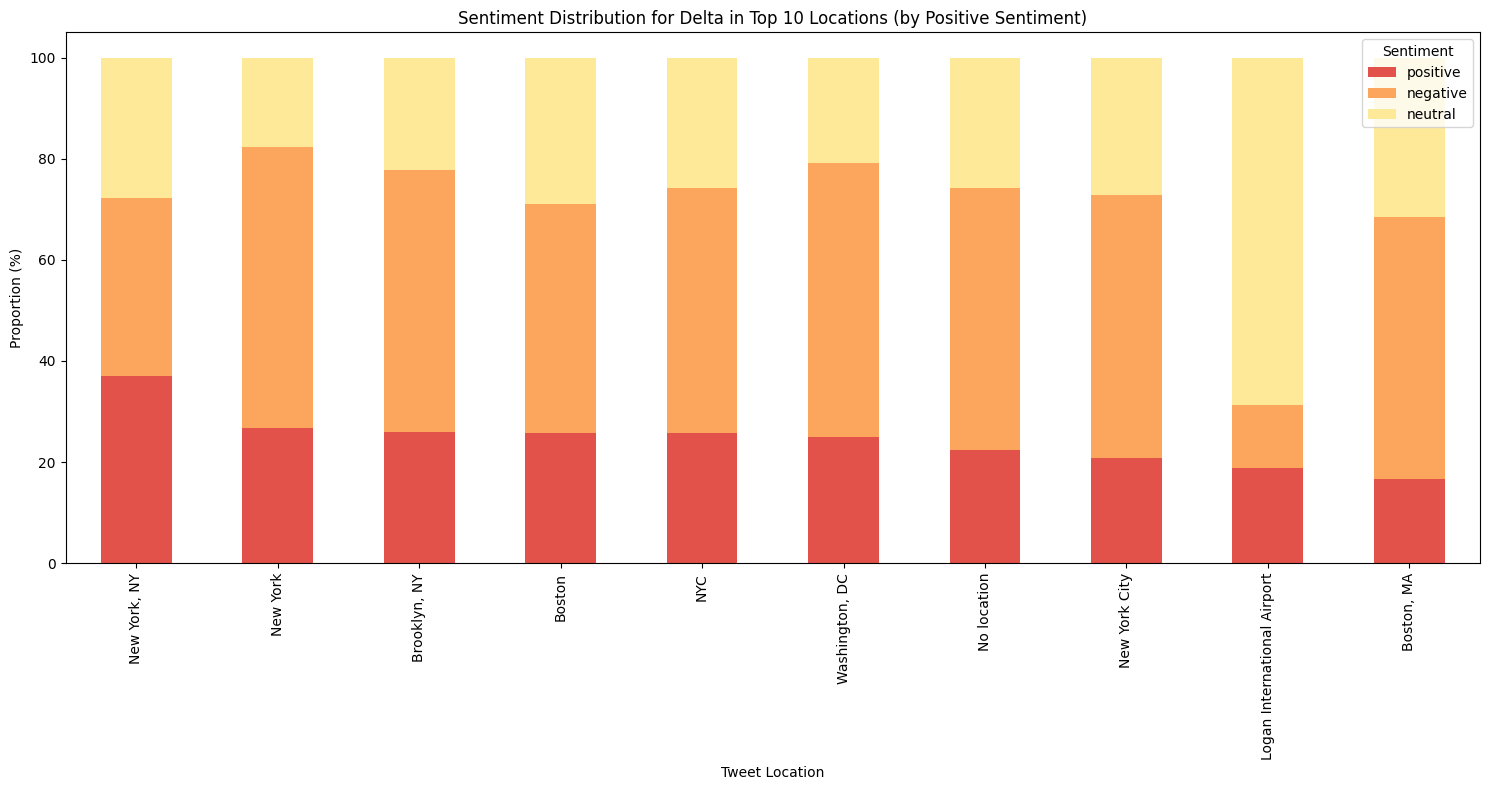

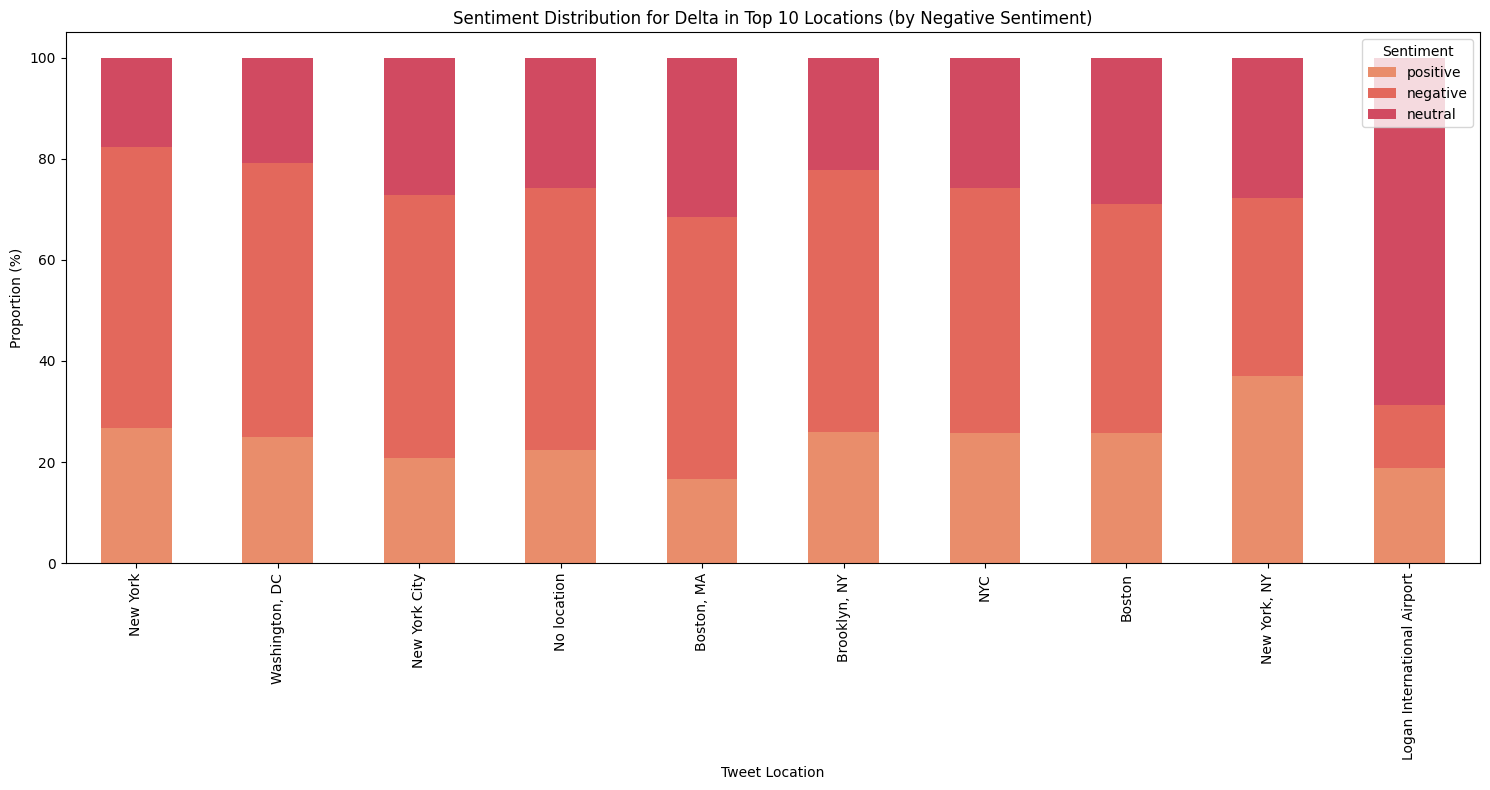


Analyzing sentiment performance for Southwest in specific locations:

Top 10 locations for Southwest with highest positive sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Nashville, TN      50.000000  36.111111  13.888889
Austin, TX         33.333333  38.095238  28.571429
No location        22.208738  48.665049  29.126214
Chicago            15.625000  65.625000  18.750000
Tallahassee, FL     0.000000  85.714286  14.285714

Top 10 locations for Southwest with highest negative sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Tallahassee, FL     0.000000  85.714286  14.285714
Chicago            15.625000  65.625000  18.750000
No location        22.208738  48.665049  29.126214
Austin, TX         33.333333  38.095238  28.571429
Nashville, TN      50.000000  36.111111  13.888889


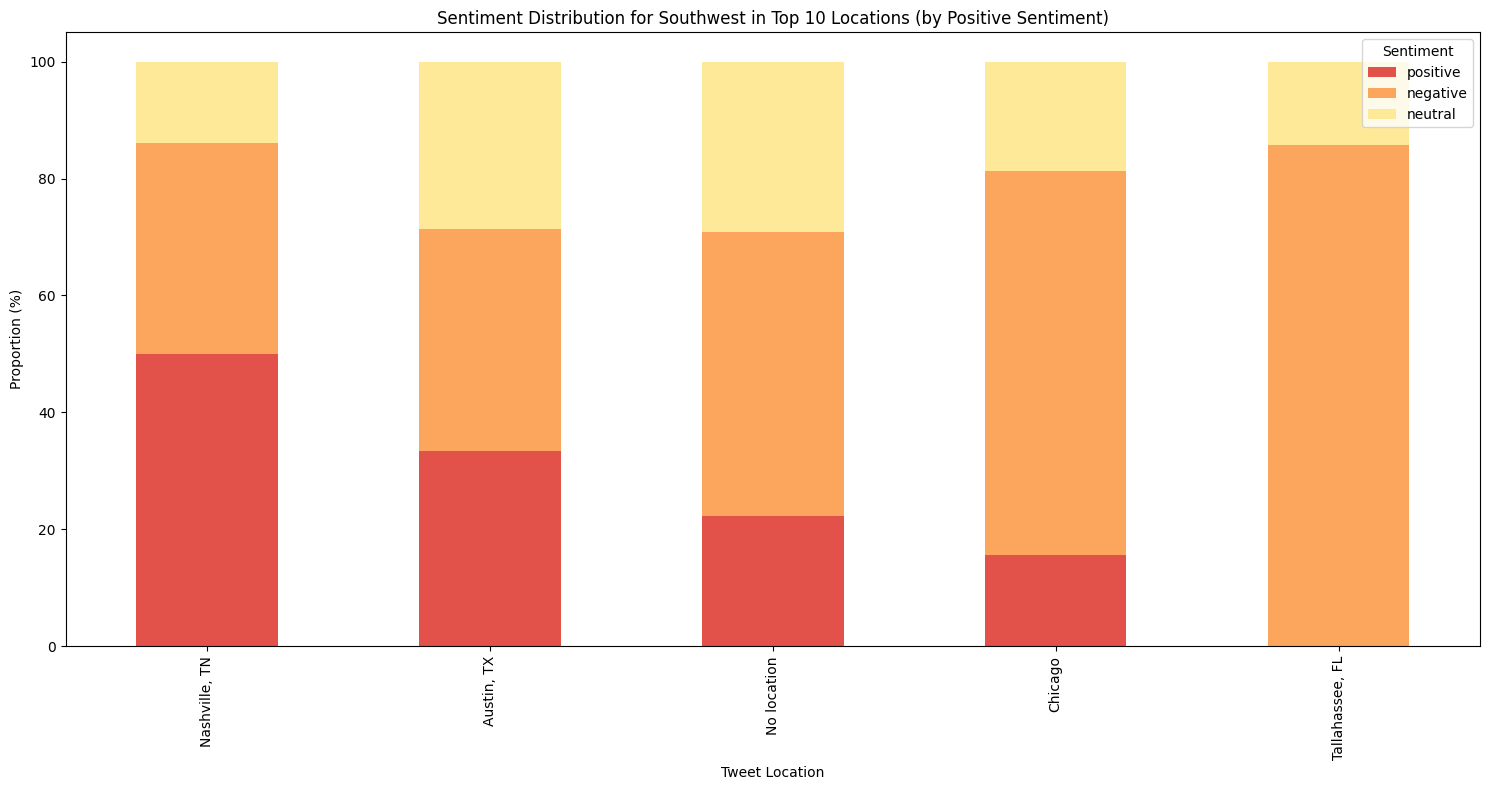

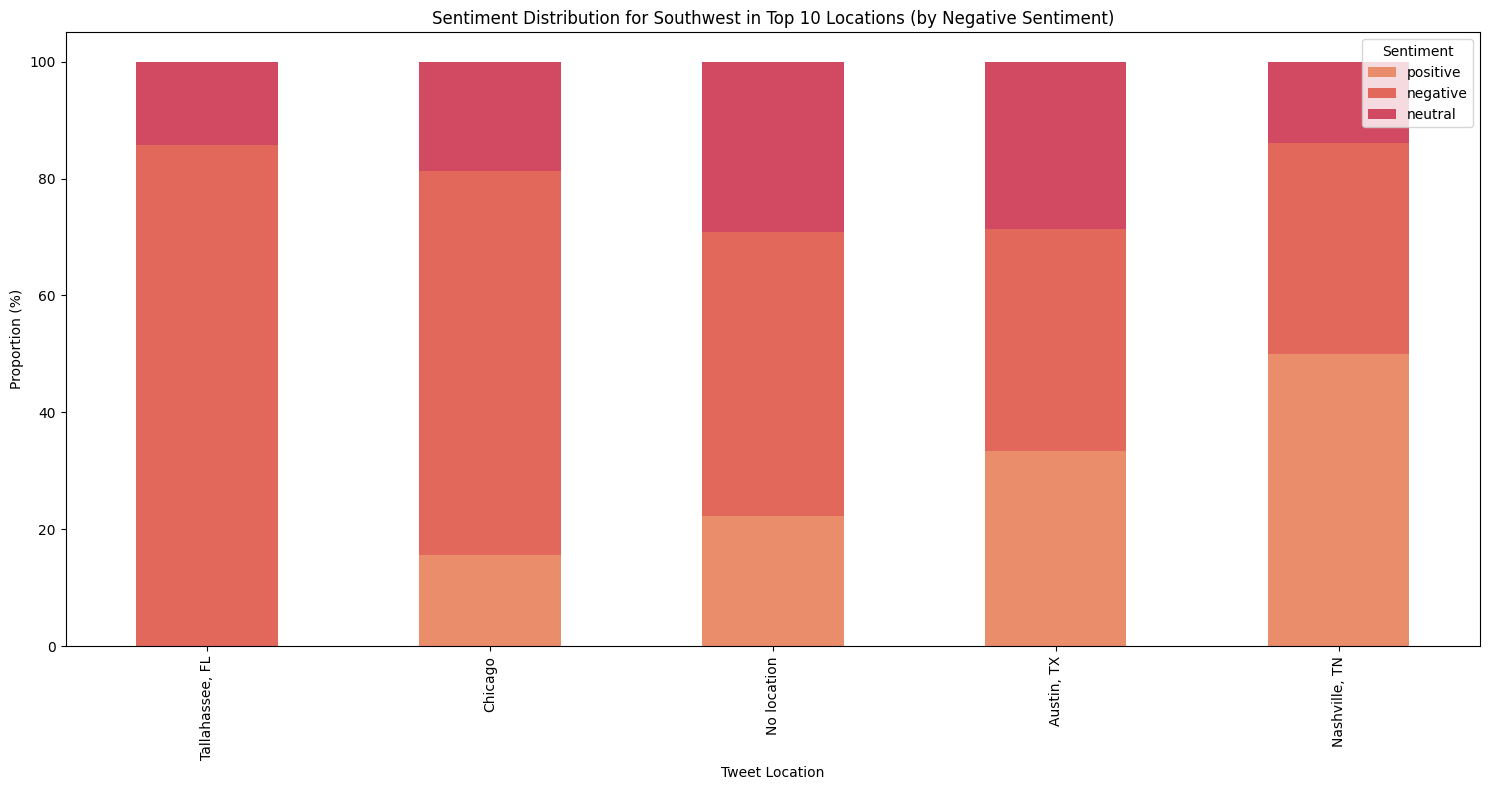


Analyzing sentiment performance for US Airways in specific locations:

Top 10 locations for US Airways with highest positive sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Washington, DC     12.500000  75.000000  12.500000
Philadelphia, PA   10.000000  75.000000  15.000000
New York            9.523810  80.952381   9.523810
NYC                 9.523810  90.476190   0.000000
Boston, MA          8.333333  86.111111   5.555556
No location         7.670720  78.203929  14.125351
Asheville, NC       4.545455  90.909091   4.545455
Washington, D.C.    2.439024  90.243902   7.317073

Top 10 locations for US Airways with highest negative sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Asheville, NC       4.545455  90.909091   4.545455
NYC                 9.523810  90.476190   0.000000
Washington, D.C.    2.439024  90.243902   7.317073
Boston, MA

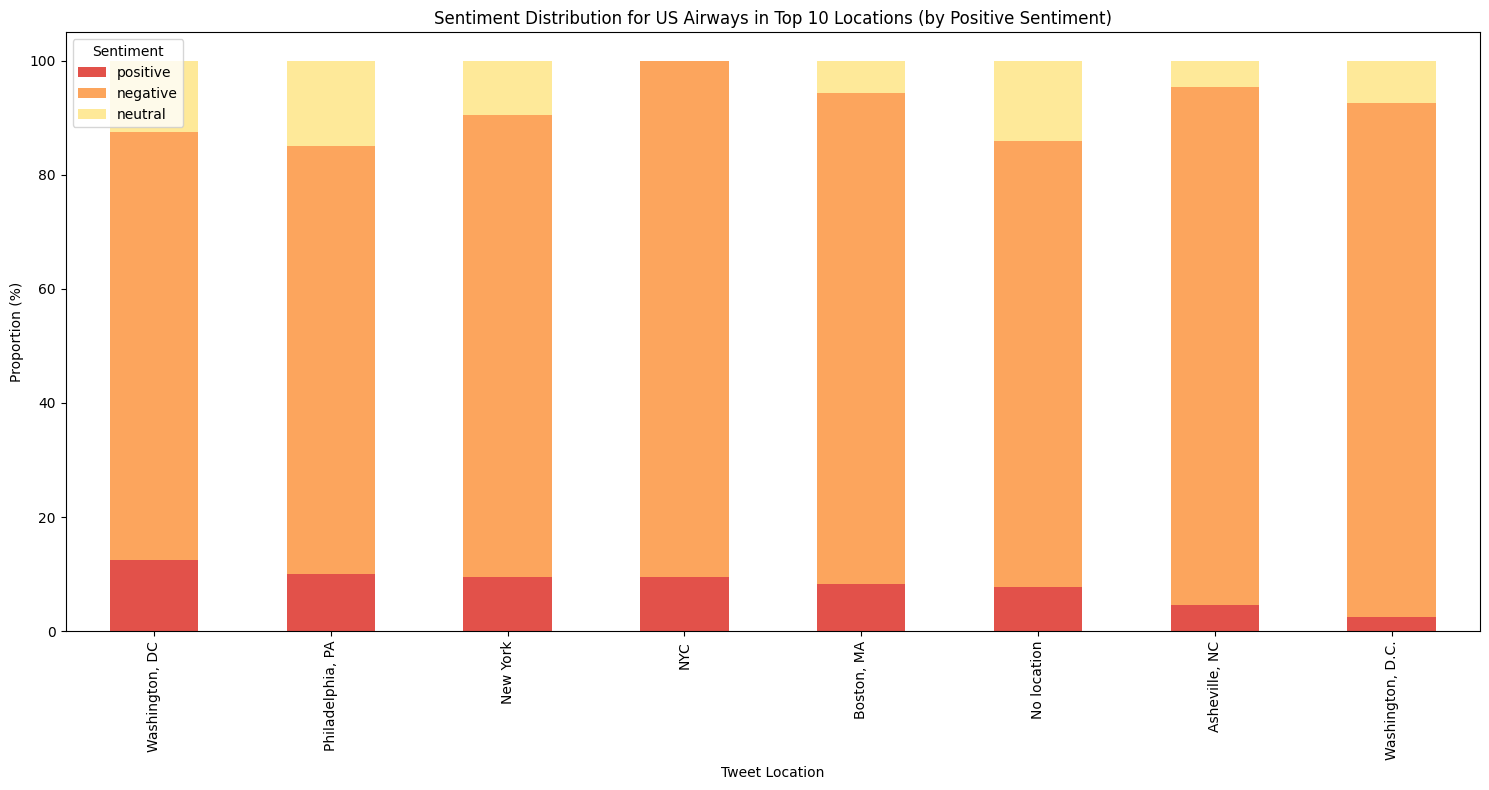

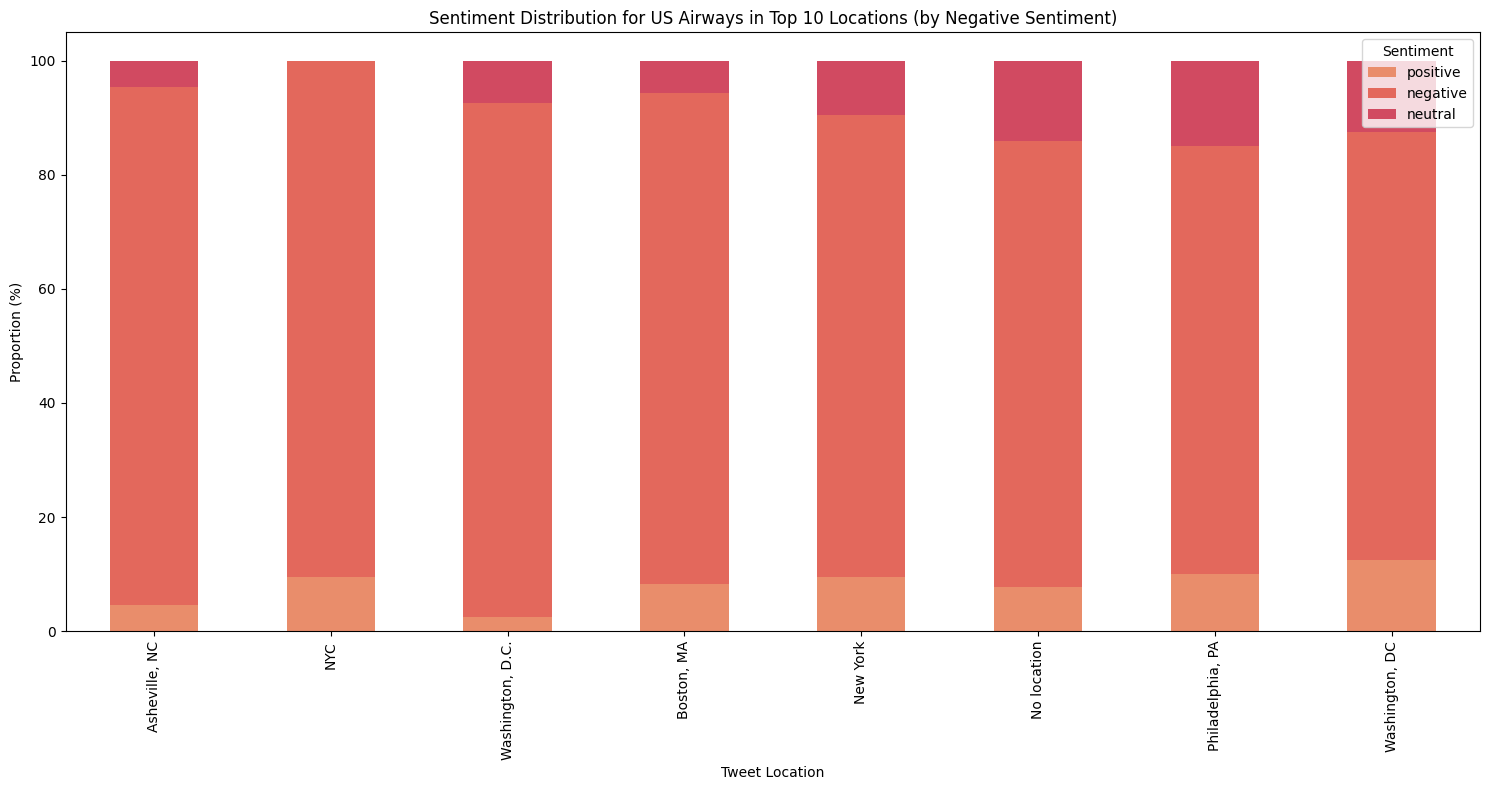


Analyzing sentiment performance for United in specific locations:

Top 10 locations for United with highest positive sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
Chicago            25.000000  69.444444   5.555556
New York, NY       15.625000  71.875000  12.500000
San Francisco      11.764706  79.411765   8.823529
Houston, TX        10.344828  89.655172   0.000000
Washington, DC     10.344828  82.758621   6.896552
No location        10.260723  70.984020  18.755257
San Francisco, CA   9.523810  80.952381   9.523810
Chicago, IL         7.500000  67.500000  25.000000
Boston, MA          7.407407  74.074074  18.518519
Seattle             4.761905  85.714286   9.523810

Top 10 locations for United with highest negative sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
NYC                 0.000000  90.909091   9.090909
Houston, TX        10.

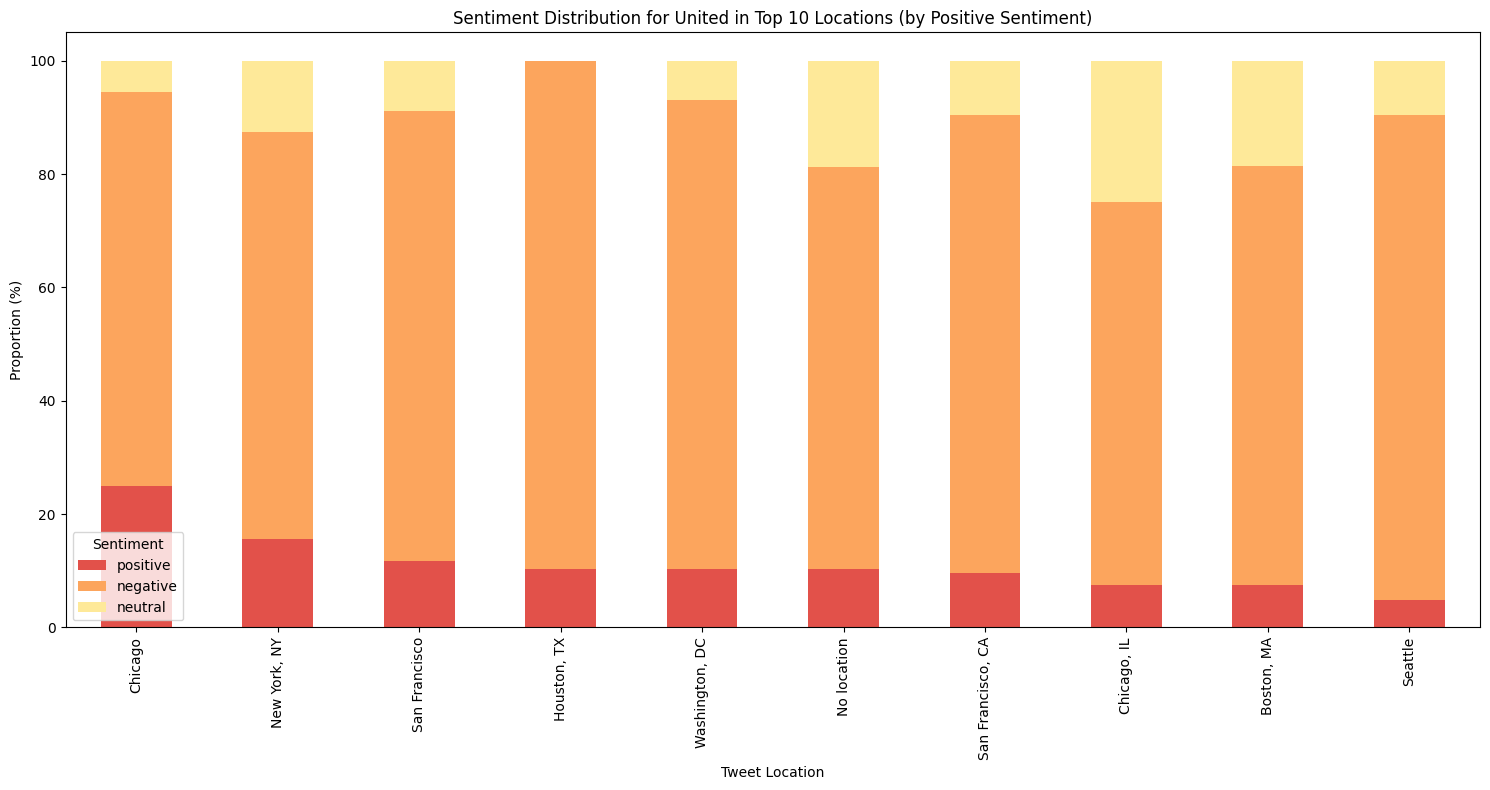

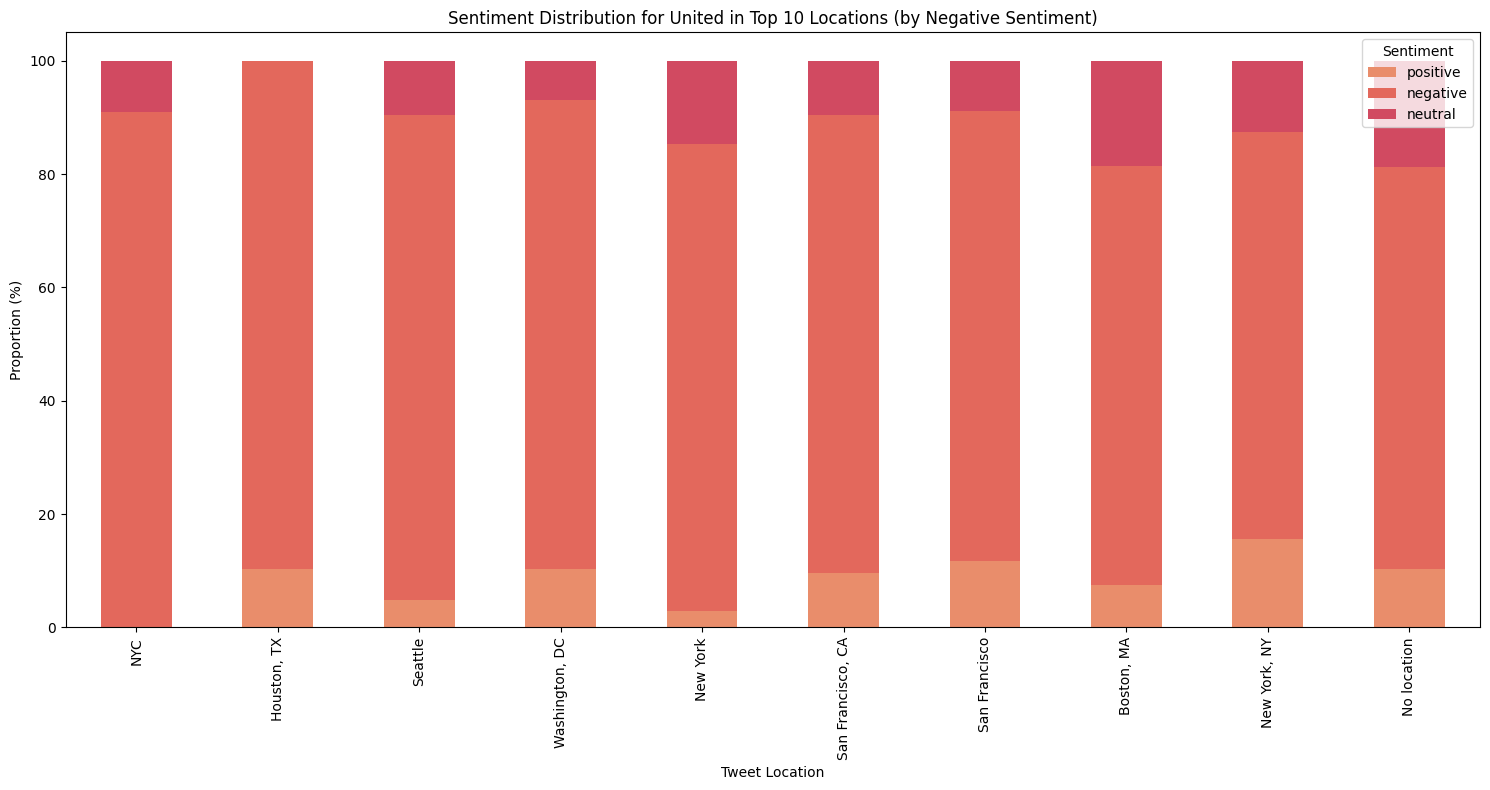


Analyzing sentiment performance for Virgin America in specific locations:

Top 10 locations for Virgin America with highest positive sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
No location        18.032787  45.081967  36.885246

Top 10 locations for Virgin America with highest negative sentiment proportion:
airline_sentiment   positive   negative    neutral
tweet_location                                    
No location        18.032787  45.081967  36.885246


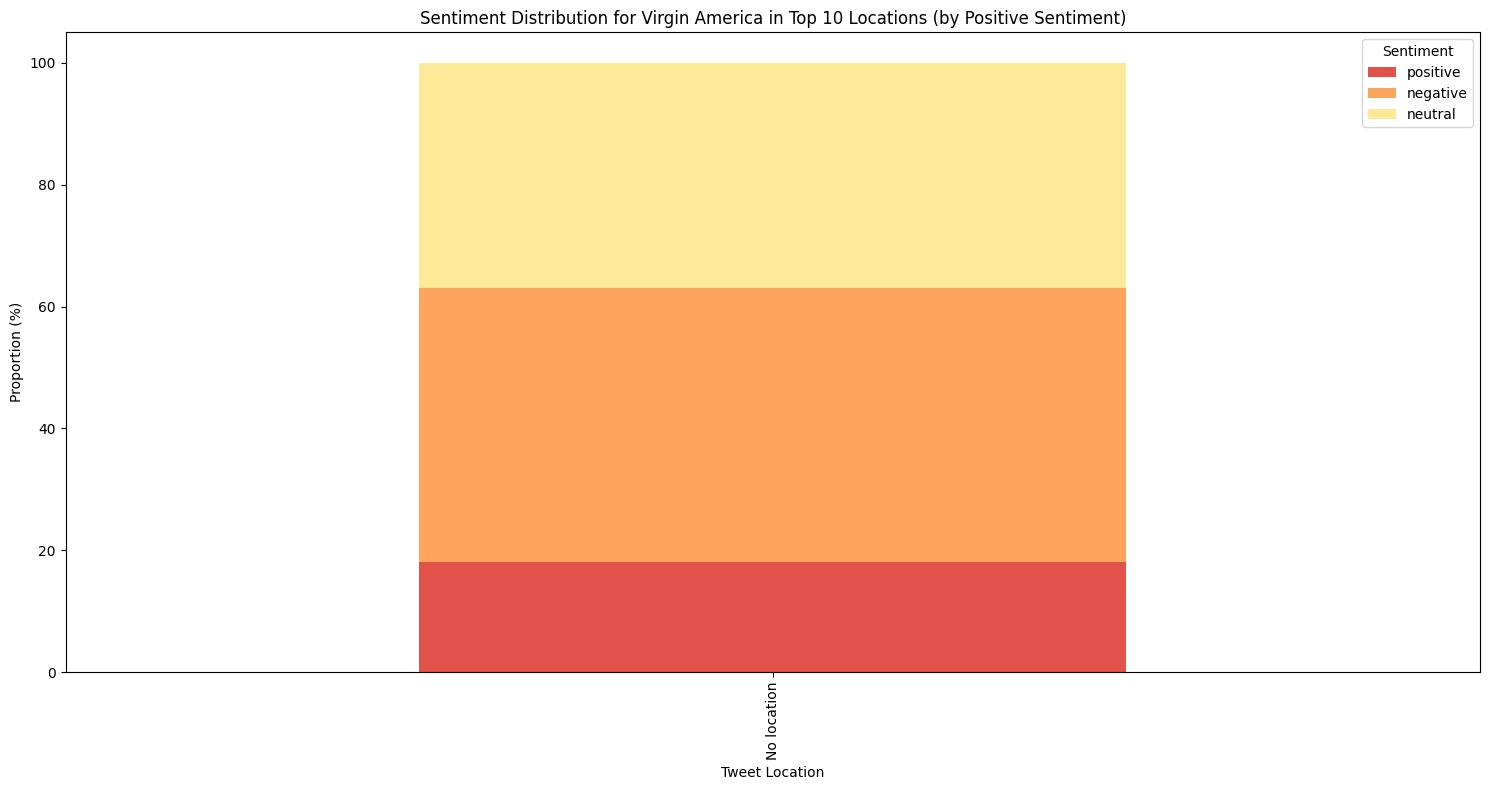

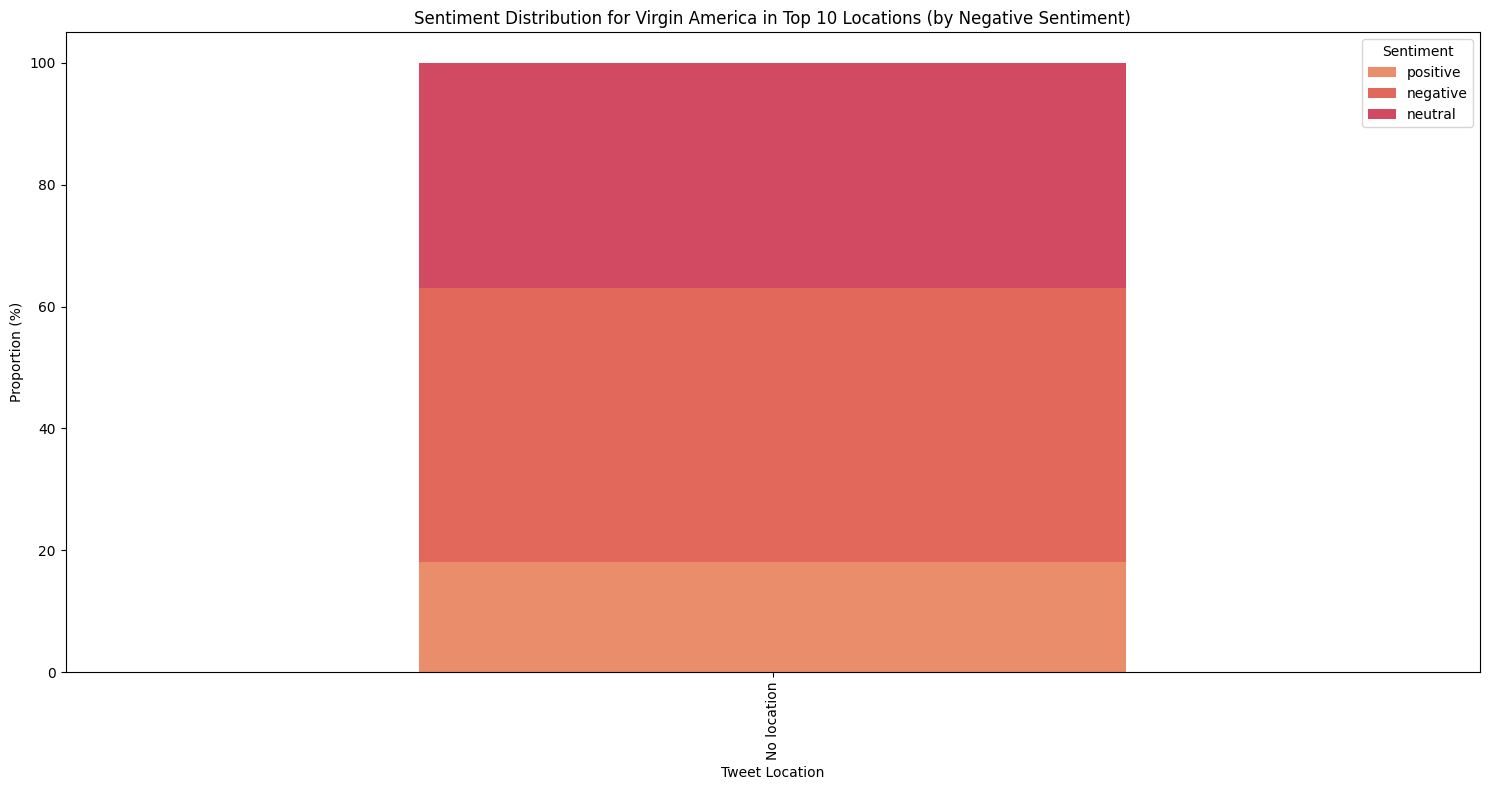

In [ ]:
airline_location_sentiment = df.groupby(['airline', 'tweet_location', 'airline_sentiment']).size().unstack(fill_value=0)
min_tweets_location_airline = 20
airline_location_sentiment_filtered = airline_location_sentiment[airline_location_sentiment.sum(axis=1) >= min_tweets_location_airline]
airline_location_sentiment_proportions = airline_location_sentiment_filtered.apply(lambda x: x / x.sum() * 100, axis=1)

# To Analyze sentiment for each airline in specific locations
for airline_to_analyze in airline_location_sentiment_proportions.index.get_level_values('airline').unique():
    print(f"\nAnalyzing sentiment performance for {airline_to_analyze} in specific locations:")
    airline_data = airline_location_sentiment_proportions.loc[airline_to_analyze]

    # Locations with highest positive sentiment proportion for the airline
    top_positive_locations = airline_data.sort_values(by='positive', ascending=False).head(10)
    print(f"\nTop 10 locations for {airline_to_analyze} with highest positive sentiment proportion:")
    print(top_positive_locations[['positive', 'negative', 'neutral']])

    # Locations with highest negative sentiment proportion for the airline
    top_negative_locations = airline_data.sort_values(by='negative', ascending=False).head(10)
    print(f"\nTop 10 locations for {airline_to_analyze} with highest negative sentiment proportion:")
    print(top_negative_locations[['positive', 'negative', 'neutral']])

    if not top_positive_locations.empty:
        plt.figure(figsize=(15, 8))
        top_positive_locations[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True, ax=plt.gca(), color = sns.color_palette('Spectral'))
        plt.title(f'Sentiment Distribution for {airline_to_analyze} in Top 10 Locations (by Positive Sentiment)')
        plt.xlabel('Tweet Location')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=90)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()

    if not top_negative_locations.empty:
        plt.figure(figsize=(15, 8))
        top_negative_locations[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True, ax=plt.gca(), color = sns.color_palette('flare'))
        plt.title(f'Sentiment Distribution for {airline_to_analyze} in Top 10 Locations (by Negative Sentiment)')
        plt.xlabel('Tweet Location')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=90)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()


Analyzing sentiment performance for American in specific timezones:

Top 10 timezones for American with highest positive sentiment proportion:
airline_sentiment             positive   negative    neutral
user_timezone                                               
Mountain Time (US & Canada)  23.076923  55.769231  21.153846
Hawaii                       20.000000  53.333333  26.666667
London                       17.567568  50.000000  32.432432
Central Time (US & Canada)   15.966387  66.806723  17.226891
No Timezone                  11.538462  72.245322  16.216216
Eastern Time (US & Canada)   10.964083  71.833648  17.202268
Buenos Aires                 10.000000  60.000000  30.000000
Pacific Time (US & Canada)    9.405941  74.257426  16.336634
Atlantic Time (Canada)        8.928571  82.142857   8.928571
Dublin                        7.692308  69.230769  23.076923

Top 10 timezones for American with highest negative sentiment proportion:
airline_sentiment            positive   negative 

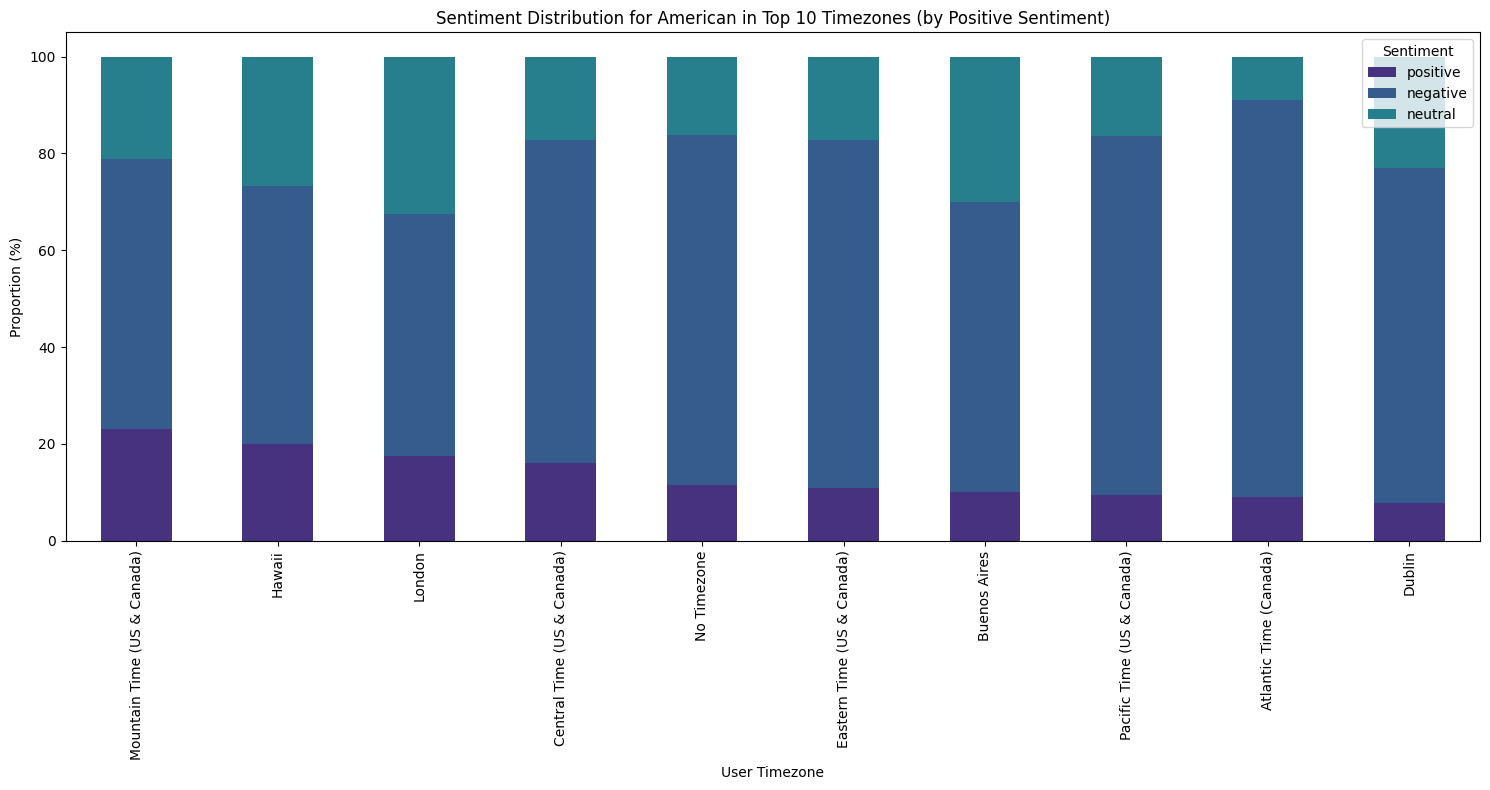

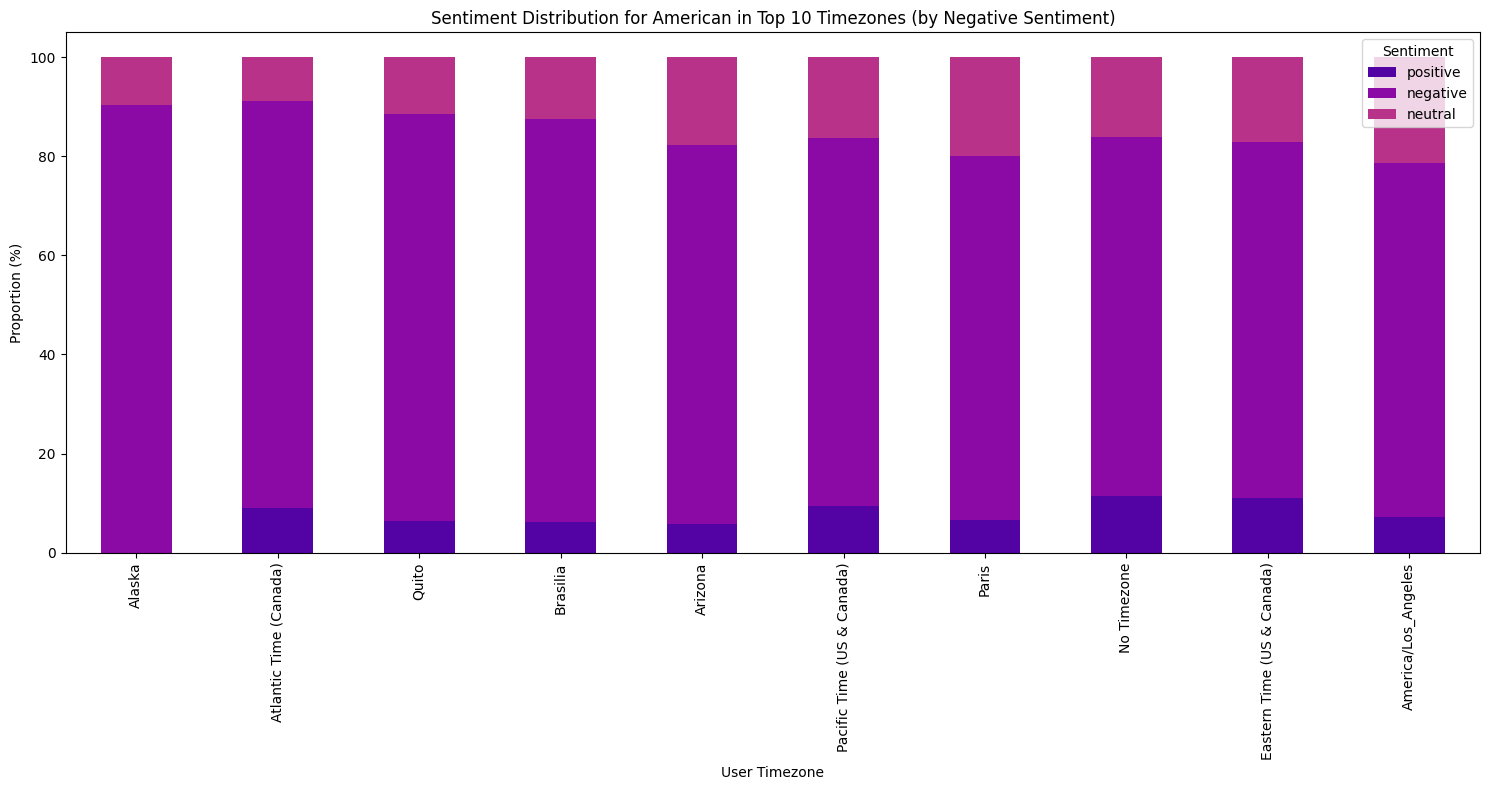


Analyzing sentiment performance for Delta in specific timezones:

Top 10 timezones for Delta with highest positive sentiment proportion:
airline_sentiment             positive   negative    neutral
user_timezone                                               
London                       35.714286  42.857143  21.428571
Mountain Time (US & Canada)  31.578947  42.105263  26.315789
Hawaii                       30.000000  40.000000  30.000000
Pacific Time (US & Canada)   29.192547  32.919255  37.888199
Eastern Time (US & Canada)   27.065868  45.868263  27.065868
America/New_York             25.000000  50.000000  25.000000
No Timezone                  23.481117  47.454844  29.064039
Atlantic Time (Canada)       22.608696  38.260870  39.130435
Quito                        22.535211  46.478873  30.985915
Arizona                      21.212121  30.303030  48.484848

Top 10 timezones for Delta with highest negative sentiment proportion:
airline_sentiment             positive   negative    neutr

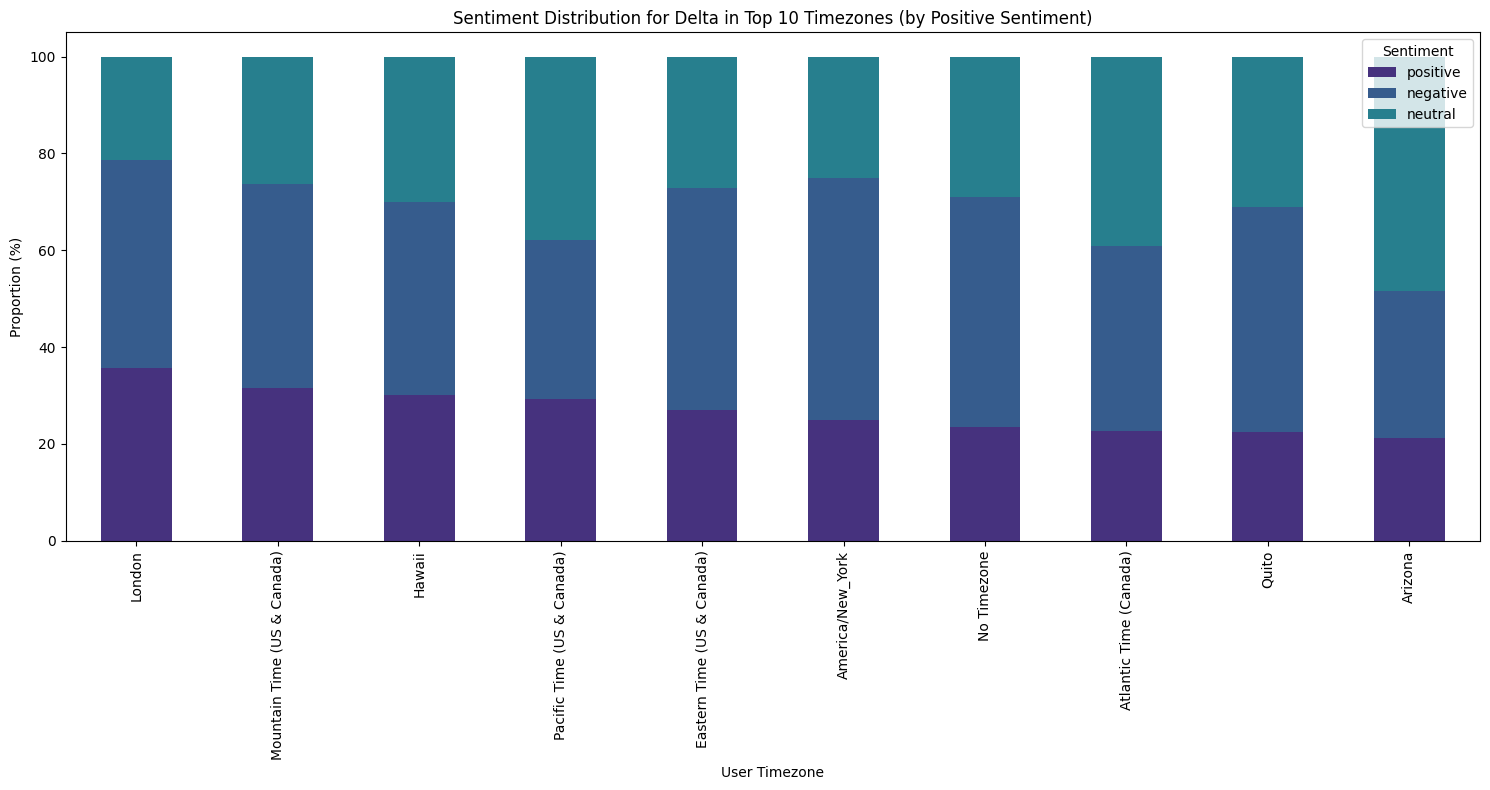

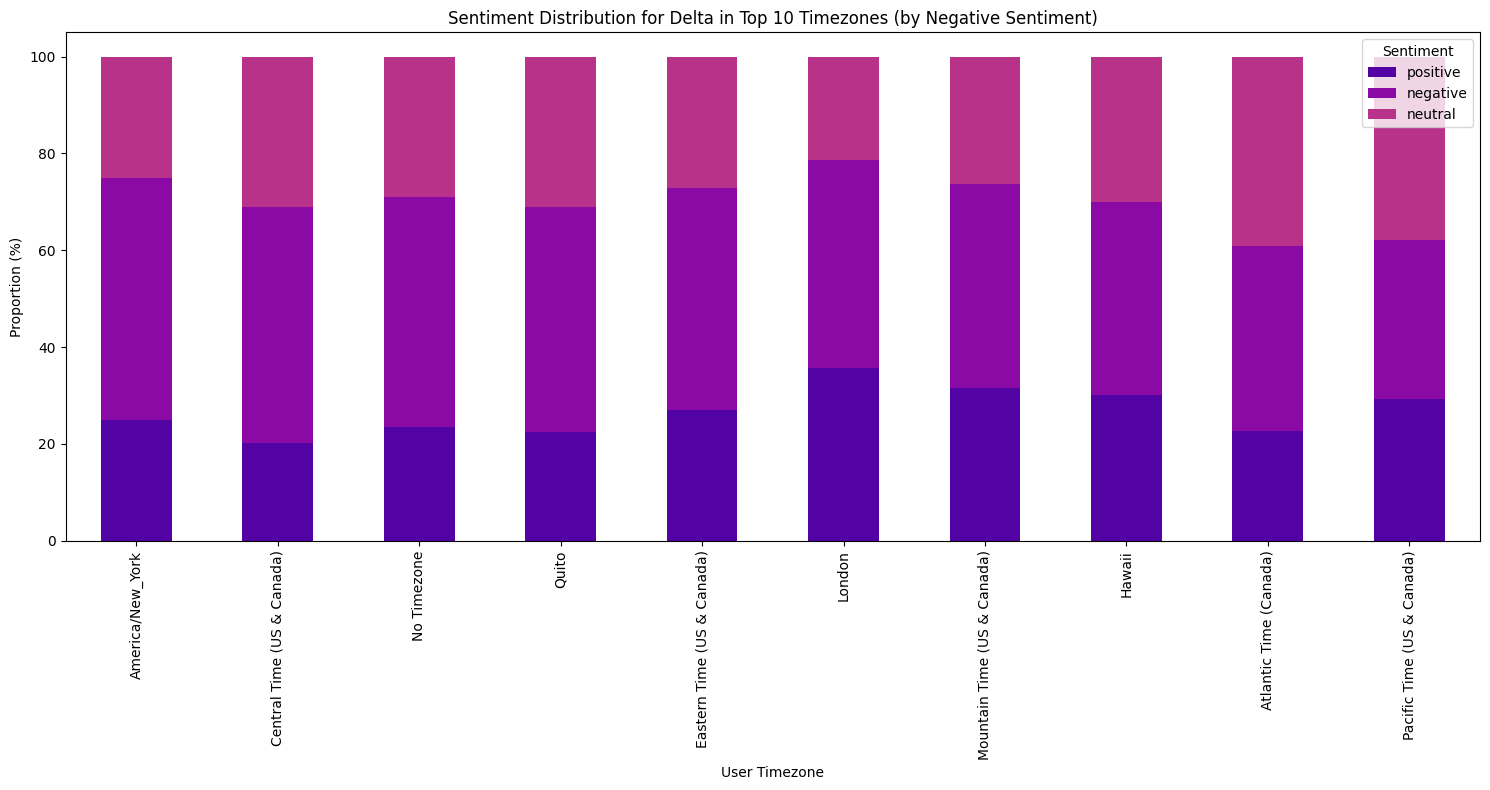


Analyzing sentiment performance for Southwest in specific timezones:

Top 10 timezones for Southwest with highest positive sentiment proportion:
airline_sentiment             positive   negative    neutral
user_timezone                                               
Alaska                       33.333333  36.666667  30.000000
Hawaii                       31.578947  31.578947  36.842105
Eastern Time (US & Canada)   26.624738  46.750524  26.624738
Central Time (US & Canada)   25.955734  50.100604  23.943662
Arizona                      25.925926  57.407407  16.666667
Pacific Time (US & Canada)   24.107143  47.321429  28.571429
No Timezone                  21.813403  48.751643  29.434954
Atlantic Time (Canada)       21.568627  48.039216  30.392157
Mountain Time (US & Canada)  20.000000  50.526316  29.473684
Quito                        10.891089  63.366337  25.742574

Top 10 timezones for Southwest with highest negative sentiment proportion:
airline_sentiment             positive   negat

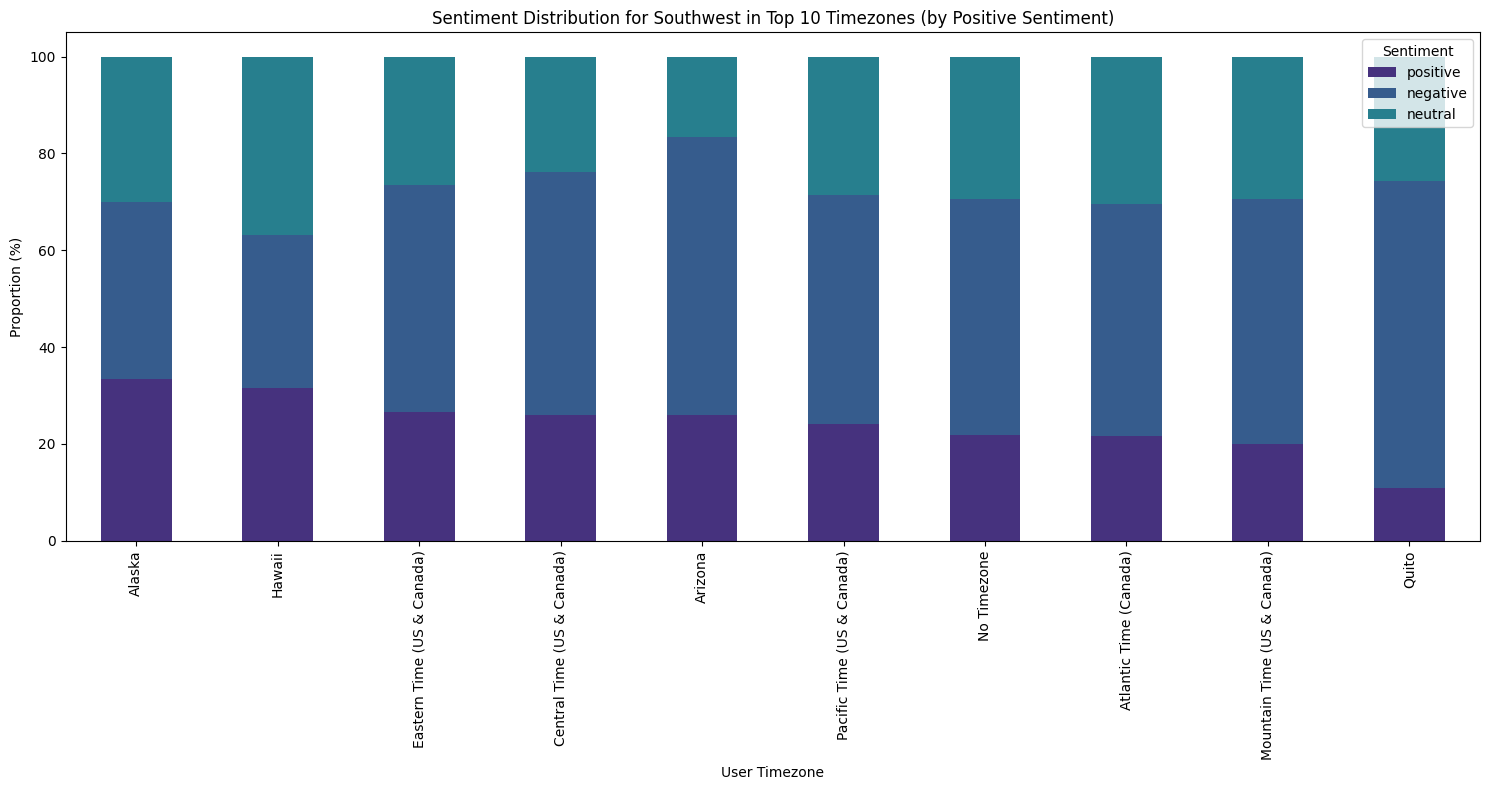

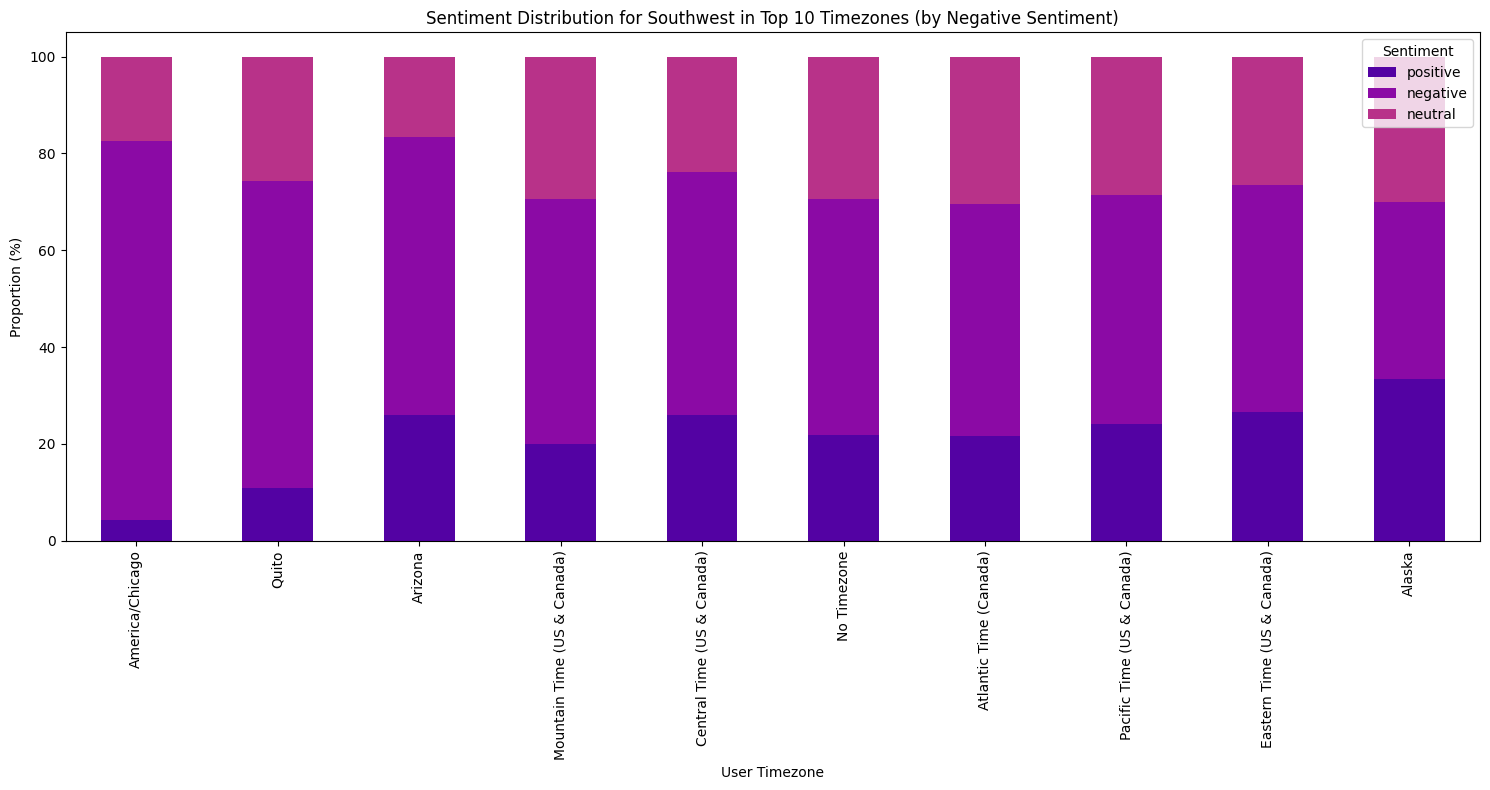


Analyzing sentiment performance for US Airways in specific timezones:

Top 10 timezones for US Airways with highest positive sentiment proportion:
airline_sentiment              positive   negative    neutral
user_timezone                                                
Abu Dhabi                    100.000000   0.000000   0.000000
Amsterdam                     16.666667  75.000000   8.333333
Arizona                       14.000000  78.000000   8.000000
London                        12.820513  74.358974  12.820513
Mountain Time (US & Canada)   12.765957  76.595745  10.638298
Hawaii                        11.111111  61.111111  27.777778
Eastern Time (US & Canada)    10.244989  75.946548  13.808463
Alaska                        10.000000  60.000000  30.000000
Pacific Time (US & Canada)     9.708738  72.815534  17.475728
Indiana (East)                 9.090909  81.818182   9.090909

Top 10 timezones for US Airways with highest negative sentiment proportion:
airline_sentiment             p

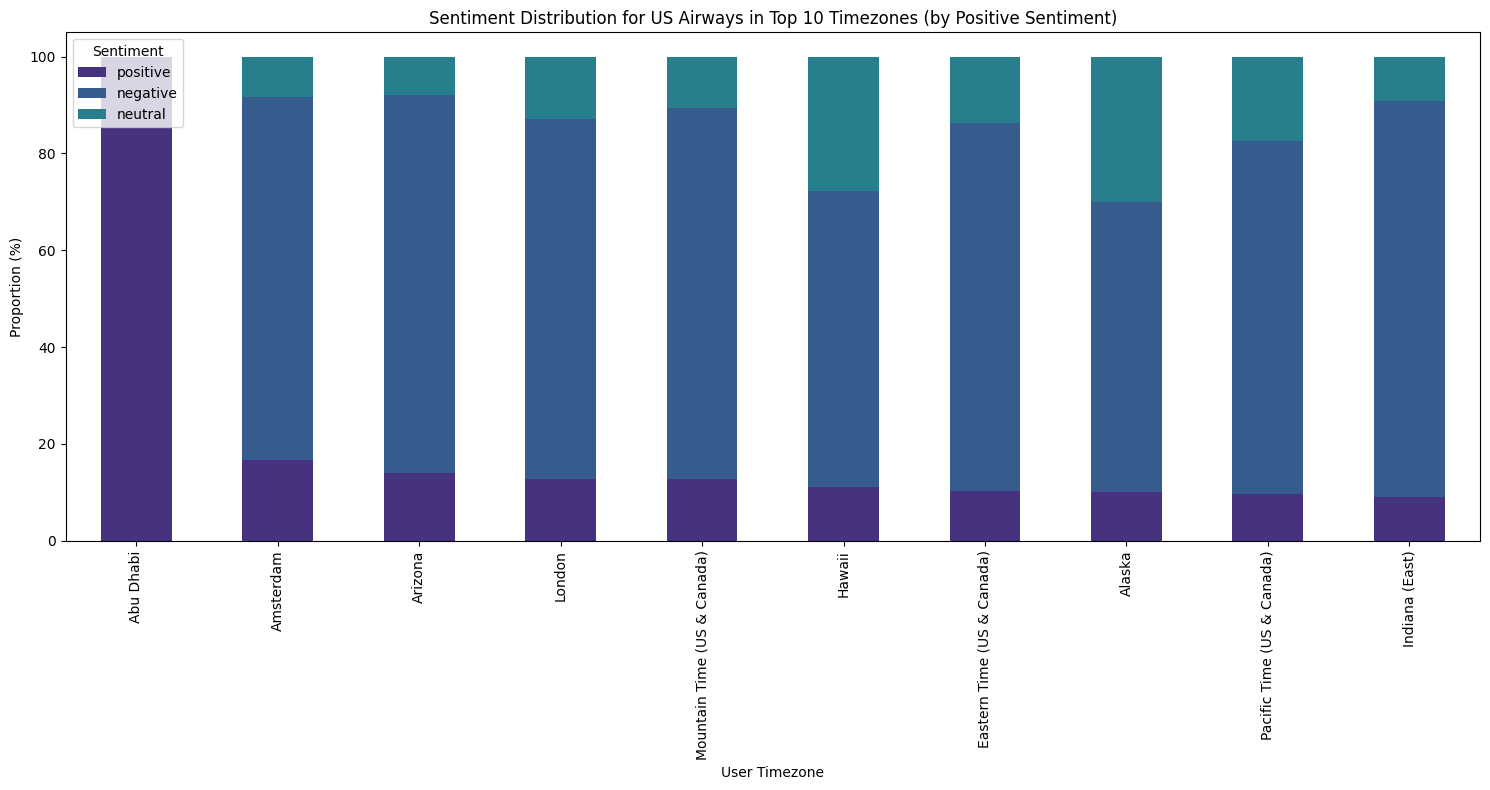

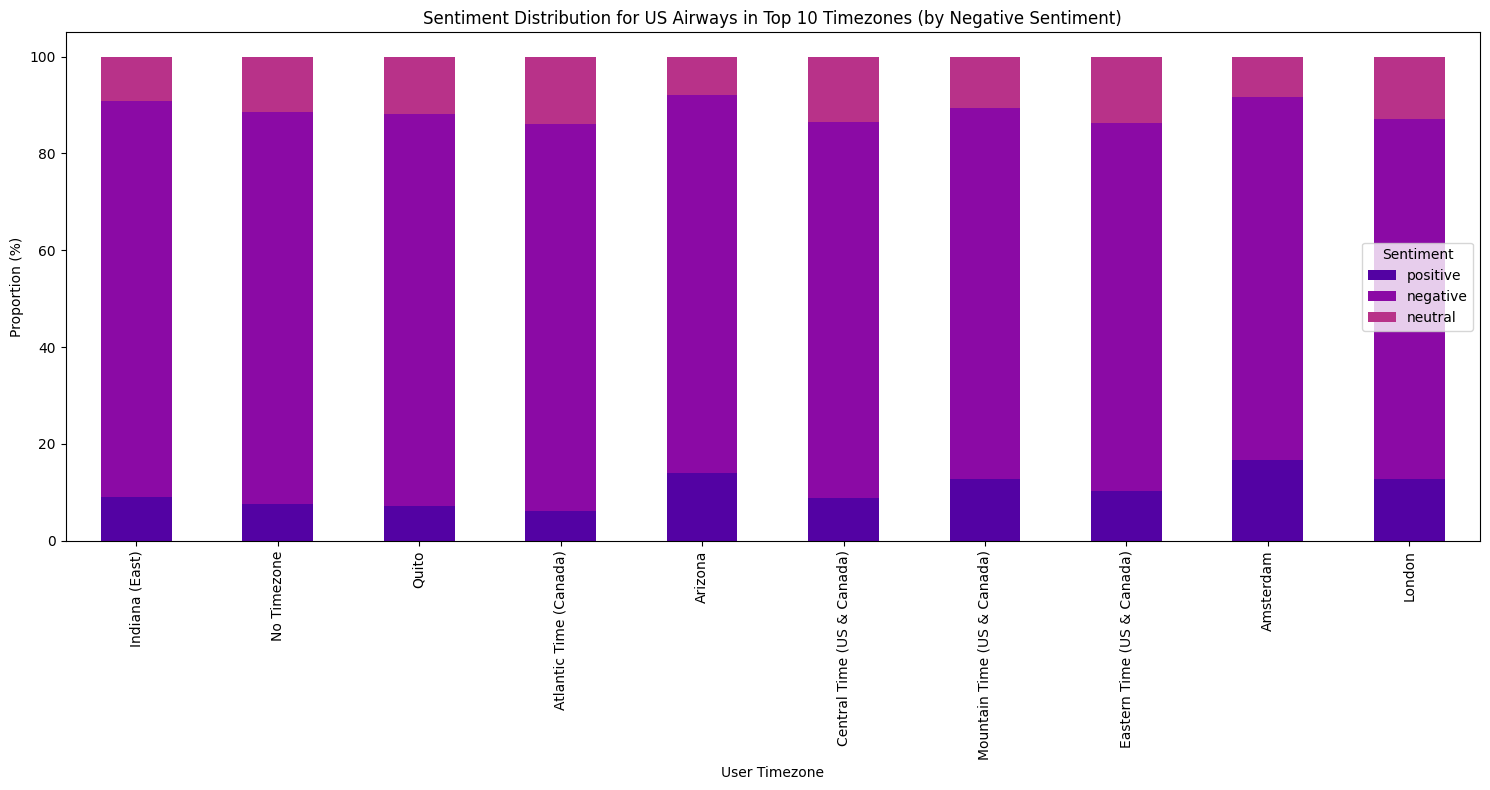


Analyzing sentiment performance for United in specific timezones:

Top 10 timezones for United with highest positive sentiment proportion:
airline_sentiment             positive   negative    neutral
user_timezone                                               
Amsterdam                    19.565217  41.304348  39.130435
Central Time (US & Canada)   16.599190  67.611336  15.789474
Arizona                      15.555556  53.333333  31.111111
Alaska                       15.384615  80.769231   3.846154
Mountain Time (US & Canada)  14.084507  71.830986  14.084507
Eastern Time (US & Canada)   13.995485  67.042889  18.961625
Atlantic Time (Canada)       13.829787  67.021277  19.148936
New Delhi                    13.333333  86.666667   0.000000
Pacific Time (US & Canada)   12.564103  73.076923  14.358974
London                       11.290323  66.129032  22.580645

Top 10 timezones for United with highest negative sentiment proportion:
airline_sentiment             positive   negative    ne

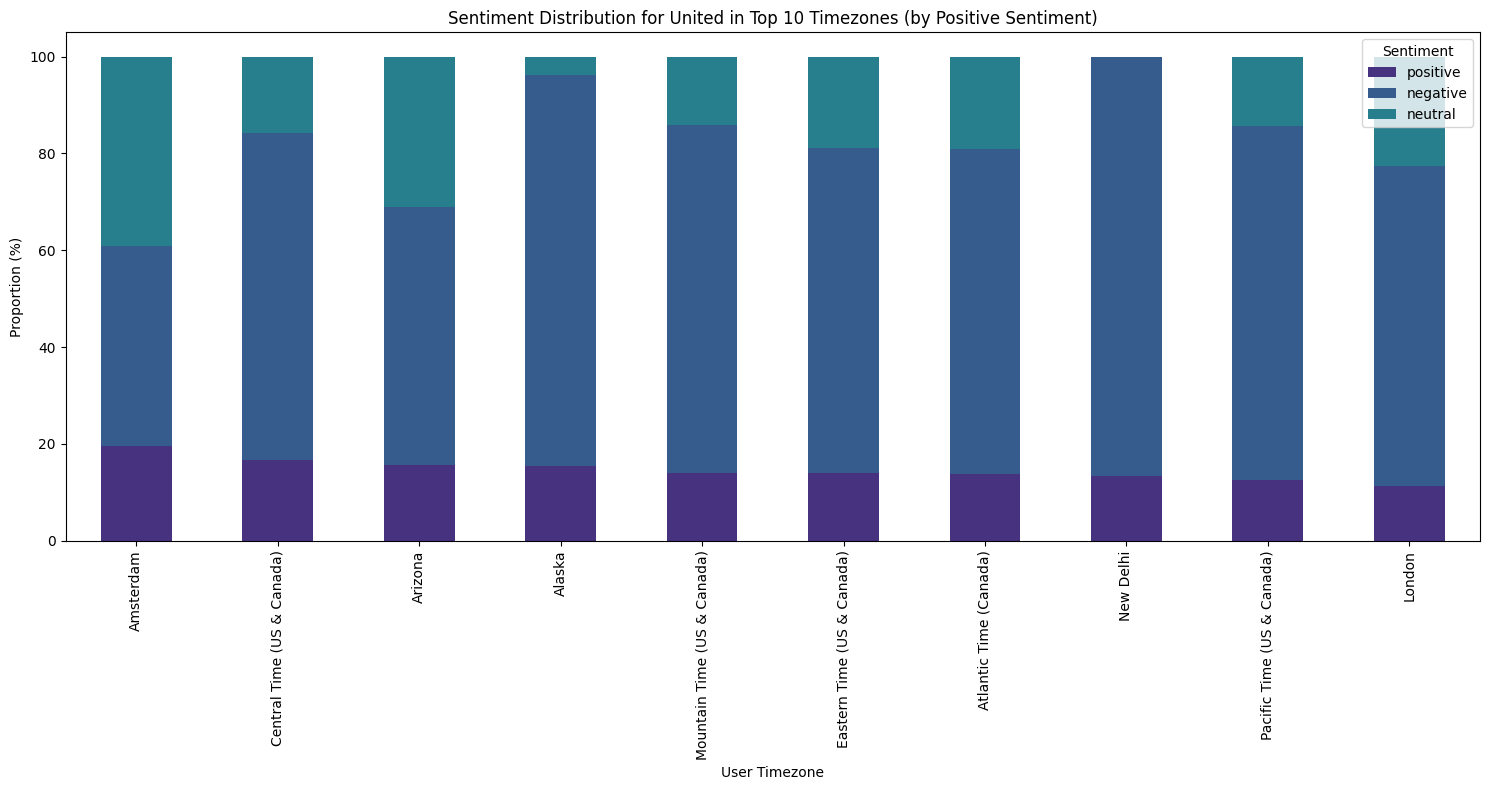

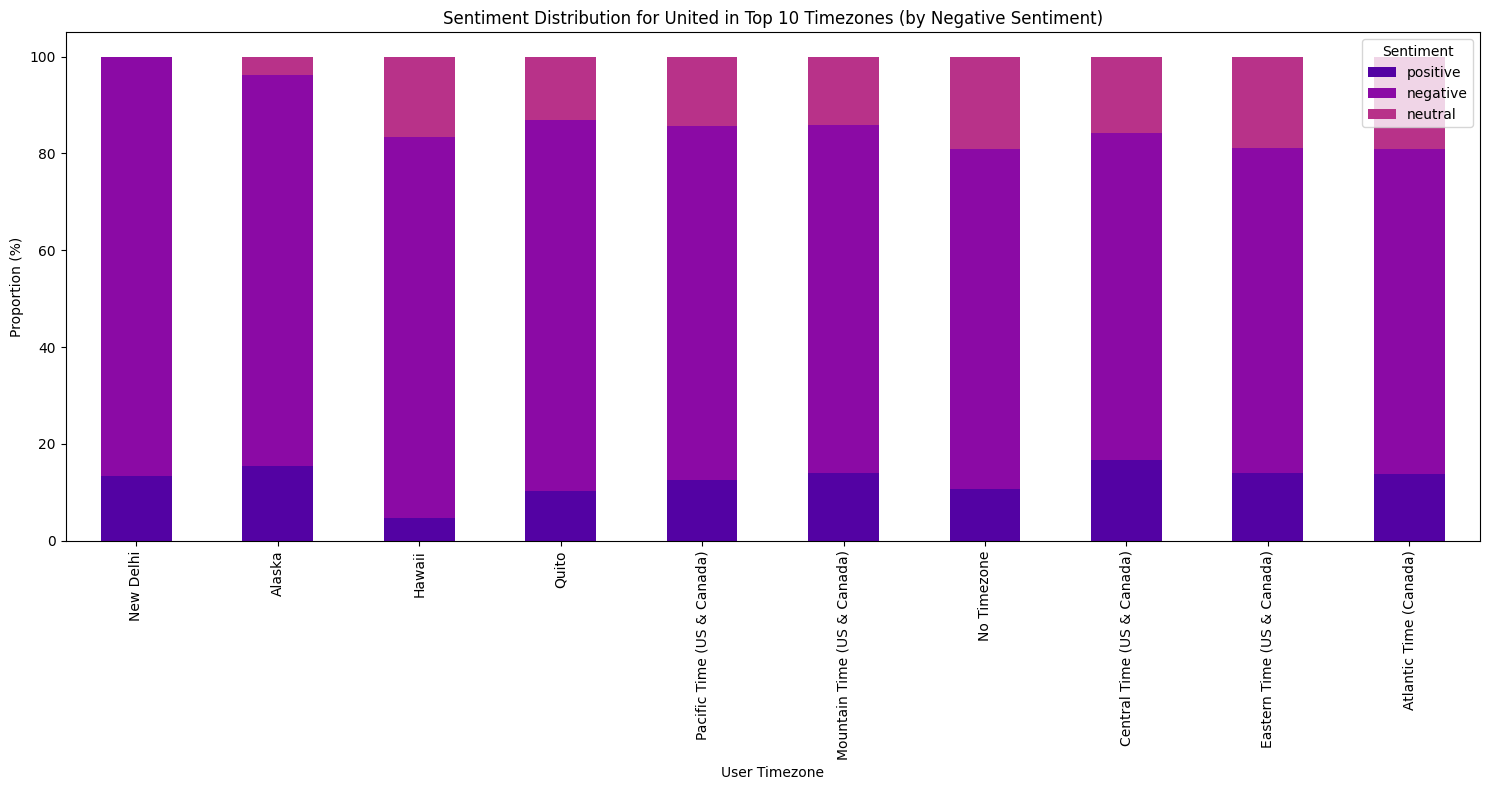


Analyzing sentiment performance for Virgin America in specific timezones:

Top 10 timezones for Virgin America with highest positive sentiment proportion:
airline_sentiment             positive   negative     neutral
user_timezone                                                
Pacific Time (US & Canada)   35.714286  38.888889   25.396825
Central Time (US & Canada)   33.962264  20.754717   45.283019
Atlantic Time (Canada)       33.333333  40.000000   26.666667
No Timezone                  31.200000  33.600000   35.200000
Eastern Time (US & Canada)   28.318584  42.477876   29.203540
Mountain Time (US & Canada)  27.272727  27.272727   45.454545
Quito                         8.333333  58.333333   33.333333
Arizona                       0.000000  33.333333   66.666667
Sydney                        0.000000   0.000000  100.000000

Top 10 timezones for Virgin America with highest negative sentiment proportion:
airline_sentiment             positive   negative     neutral
user_timezone      

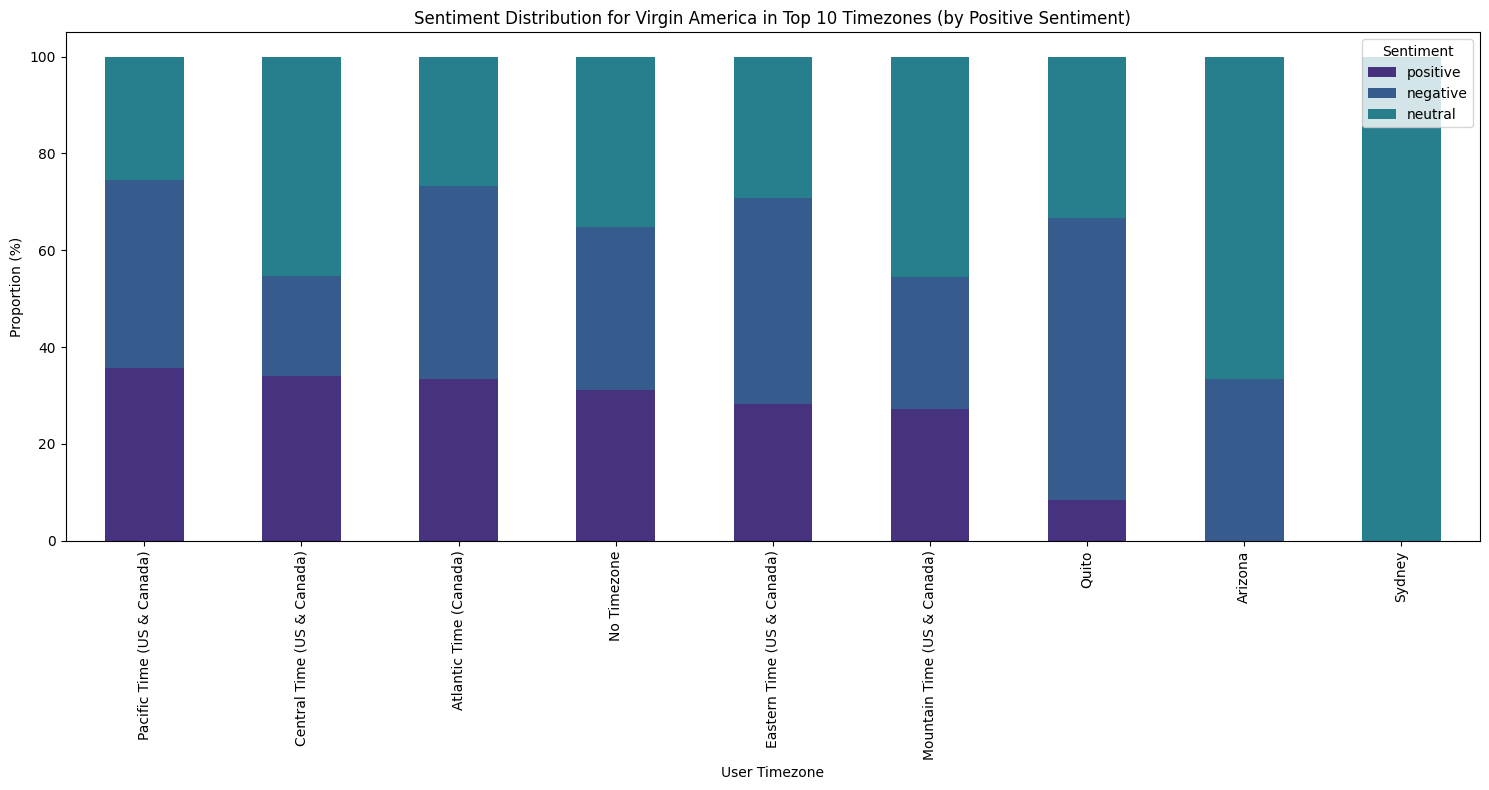

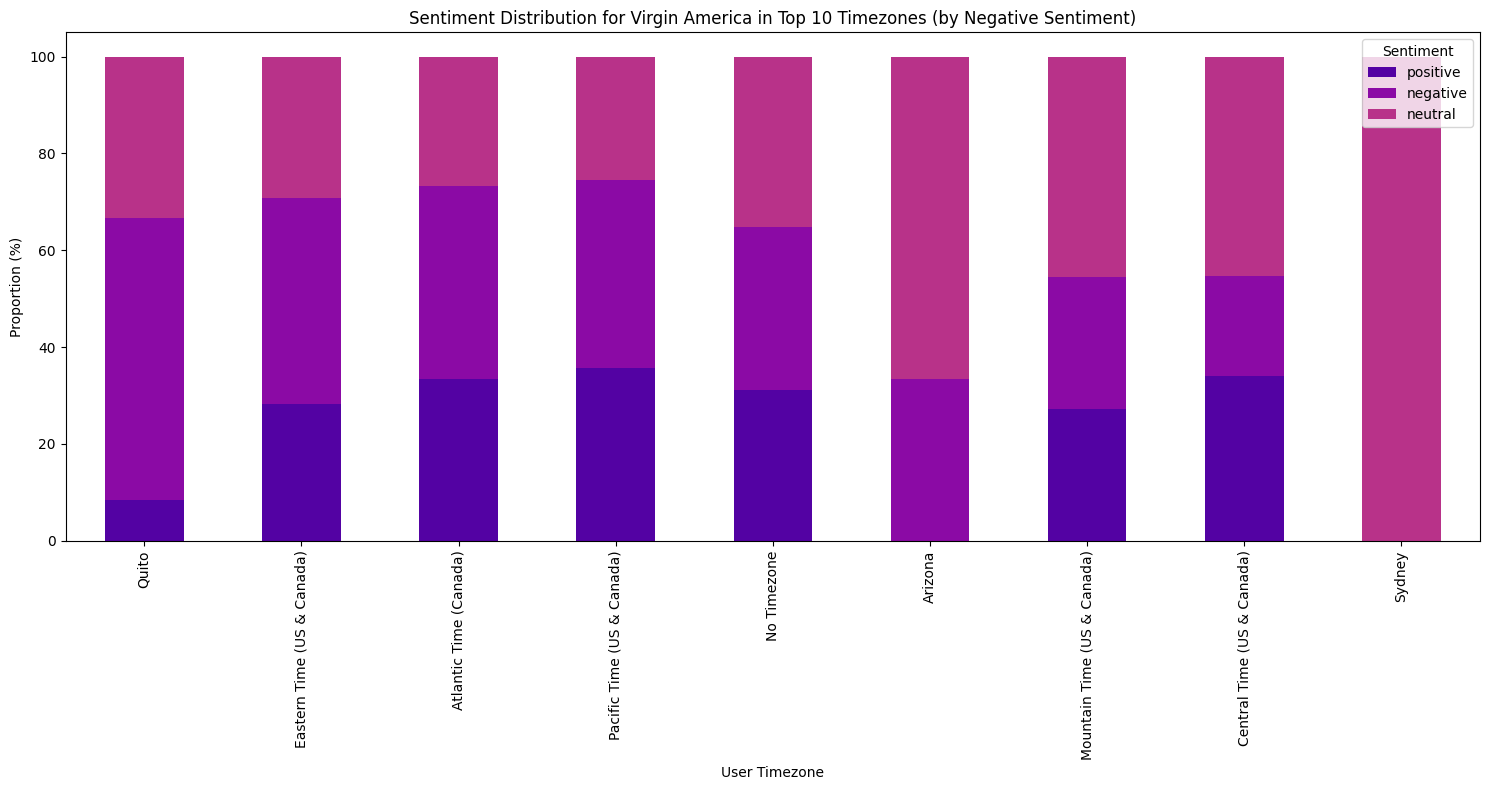

In [ ]:
# Analyze sentiment for each airline in specific timezones
airline_timezone_sentiment = df.groupby(['airline', 'user_timezone', 'airline_sentiment']).size().unstack(fill_value=0)
min_tweets_timezone_airline = 10
airline_timezone_sentiment_filtered = airline_timezone_sentiment[airline_timezone_sentiment.sum(axis=1) >= min_tweets_timezone_airline]
airline_timezone_sentiment_proportions = airline_timezone_sentiment_filtered.apply(lambda x: x / x.sum() * 100, axis=1)

for airline_to_analyze in airline_timezone_sentiment_proportions.index.get_level_values('airline').unique():
    print(f"\nAnalyzing sentiment performance for {airline_to_analyze} in specific timezones:")

    airline_data_tz = airline_timezone_sentiment_proportions.loc[airline_to_analyze]

    # Timezones with highest positive sentiment proportion for the airline
    top_positive_timezones = airline_data_tz.sort_values(by='positive', ascending=False).head(10)
    print(f"\nTop 10 timezones for {airline_to_analyze} with highest positive sentiment proportion:")
    print(top_positive_timezones[['positive', 'negative', 'neutral']])

    # Timezones with highest negative sentiment proportion for the airline
    top_negative_timezones = airline_data_tz.sort_values(by='negative', ascending=False).head(10)
    print(f"\nTop 10 timezones for {airline_to_analyze} with highest negative sentiment proportion:")
    print(top_negative_timezones[['positive', 'negative', 'neutral']])

    if not top_positive_timezones.empty:
        plt.figure(figsize=(15, 8))
        top_positive_timezones[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True, ax=plt.gca(), color = sns.color_palette('viridis'))
        plt.title(f'Sentiment Distribution for {airline_to_analyze} in Top 10 Timezones (by Positive Sentiment)')
        plt.xlabel('User Timezone')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=90)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()

    if not top_negative_timezones.empty:
        plt.figure(figsize=(15, 8))
        top_negative_timezones[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True, ax=plt.gca(), color = sns.color_palette('plasma'))
        plt.title(f'Sentiment Distribution for {airline_to_analyze} in Top 10 Timezones (by Negative Sentiment)')
        plt.xlabel('User Timezone')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=90)
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()


/tmp/ipython-input-342-4029404836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_timezone', y='tweet_volume', data=timezone_tweet_volume_filtered.head(top_n_timezones_volume), palette='viridis')


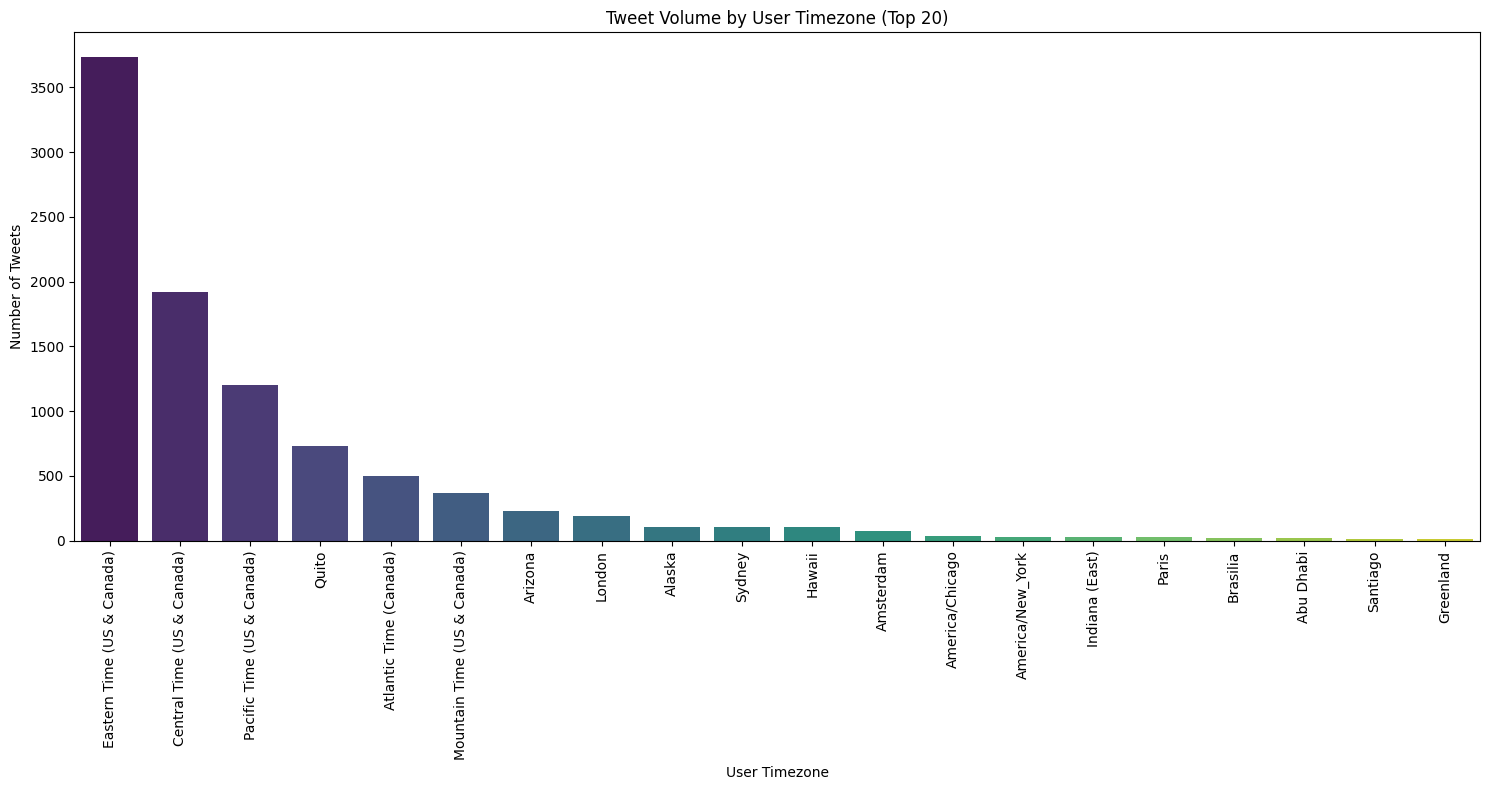

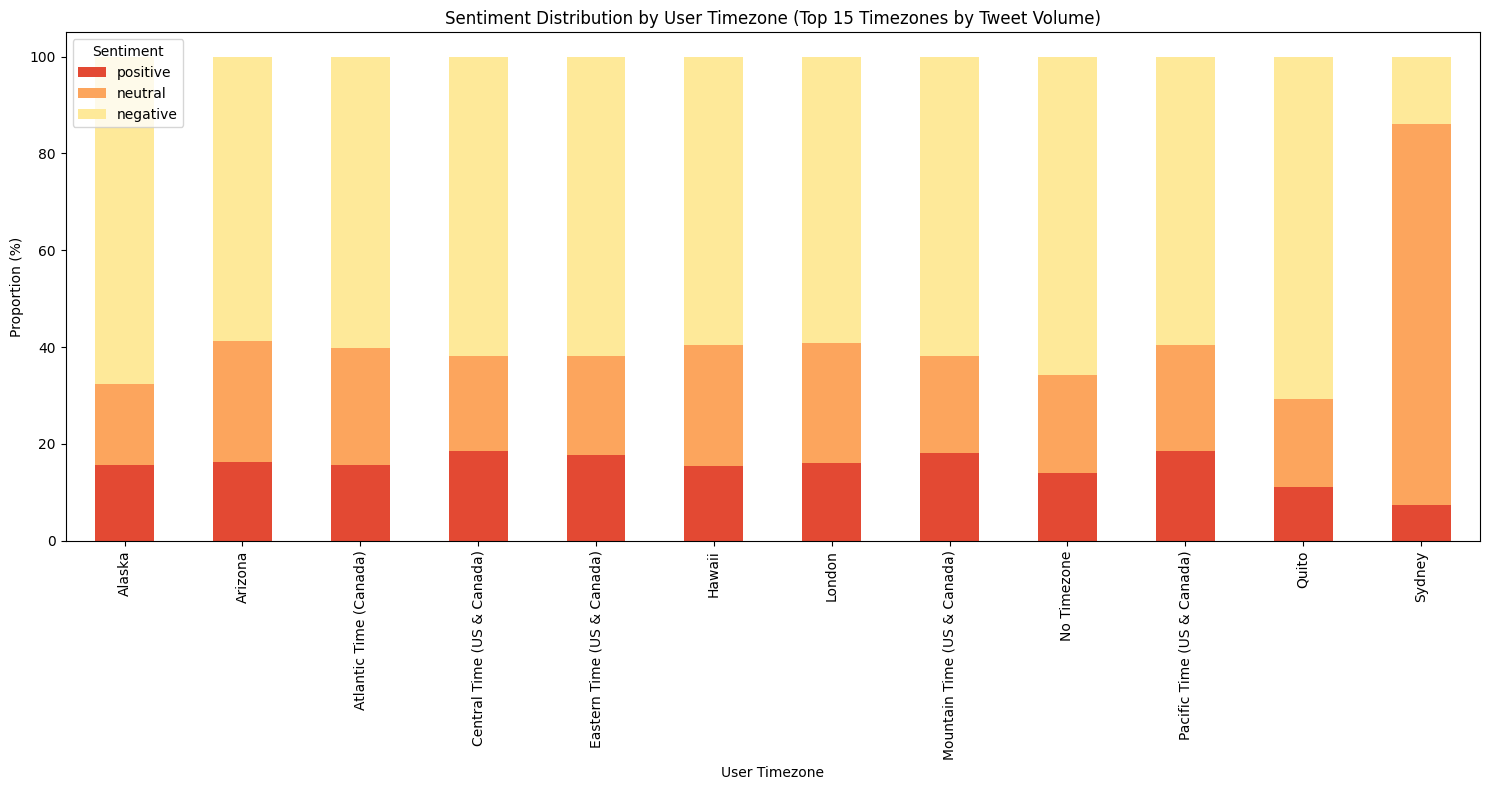


Sentiment Proportion by User Timezone (filtered for timezones with >= 100 tweets):
airline_sentiment            negative    neutral   positive
user_timezone                                              
Quito                       70.804911  18.008186  11.186903
Alaska                      67.592593  16.666667  15.740741
No Timezone                 65.745742  20.170337  14.083922
Eastern Time (US & Canada)  61.797753  20.572499  17.629749
Central Time (US & Canada)  61.778471  19.760790  18.460738
airline_sentiment             negative    neutral   positive
user_timezone                                               
Pacific Time (US & Canada)   59.535655  21.890547  18.573798
Central Time (US & Canada)   61.778471  19.760790  18.460738
Mountain Time (US & Canada)  61.748634  20.218579  18.032787
Eastern Time (US & Canada)   61.797753  20.572499  17.629749
Arizona                      58.771930  25.000000  16.228070


In [ ]:
timezone_tweet_volume = df['user_timezone'].value_counts().reset_index()
timezone_tweet_volume.columns = ['user_timezone', 'tweet_volume']

# Filter out 'No Timezone' if you don't want to include it in the visualization
timezone_tweet_volume_filtered = timezone_tweet_volume[timezone_tweet_volume['user_timezone'] != 'No Timezone']

top_n_timezones_volume = 20
plt.figure(figsize=(15, 8))
sns.barplot(x='user_timezone', y='tweet_volume', data=timezone_tweet_volume_filtered.head(top_n_timezones_volume), palette='viridis')
plt.title(f'Tweet Volume by User Timezone (Top {top_n_timezones_volume})')
plt.xlabel('User Timezone')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

timezone_sentiment_counts = df.groupby(['user_timezone', 'airline_sentiment']).size().unstack(fill_value=0)
min_tweets_for_sentiment_proportion = 100 # Adjust the threshold how much ever you need
timezone_sentiment_filtered_for_proportion = timezone_sentiment_counts[timezone_sentiment_counts.sum(axis=1) >= min_tweets_for_sentiment_proportion]
timezone_sentiment_proportions = timezone_sentiment_filtered_for_proportion.apply(lambda x: x / x.sum() * 100, axis=1)

top_n_timezones_sentiment = 15 # display of sentiment for top timezones by volume or based on filtered list size

plt.figure(figsize=(15, 8))
timezone_sentiment_proportions.head(top_n_timezones_sentiment)[['positive', 'neutral', 'negative']].plot(kind='bar', stacked=True, ax=plt.gca(), color=sns.color_palette('RdYlGn'))
plt.title(f'Sentiment Distribution by User Timezone (Top {top_n_timezones_sentiment} Timezones by Tweet Volume)')
plt.xlabel('User Timezone')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

print("\nSentiment Proportion by User Timezone (filtered for timezones with >= {} tweets):".format(min_tweets_for_sentiment_proportion))
print(timezone_sentiment_proportions.sort_values(by='negative', ascending=False).head()) # Timezones with highest negative proportion
print(timezone_sentiment_proportions.sort_values(by='positive', ascending=False).head()) # Timezones with highest positive proportion

3. Program Effectiveness & Customer Behavior



Average Retweet Count by Sentiment:
  airline_sentiment  retweet_count
0          negative       0.093460
1           neutral       0.061145
2          positive       0.069669


/tmp/ipython-input-343-3476404587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline_sentiment', y='retweet_count', data=tweet_retweet_sentiment, palette='viridis')


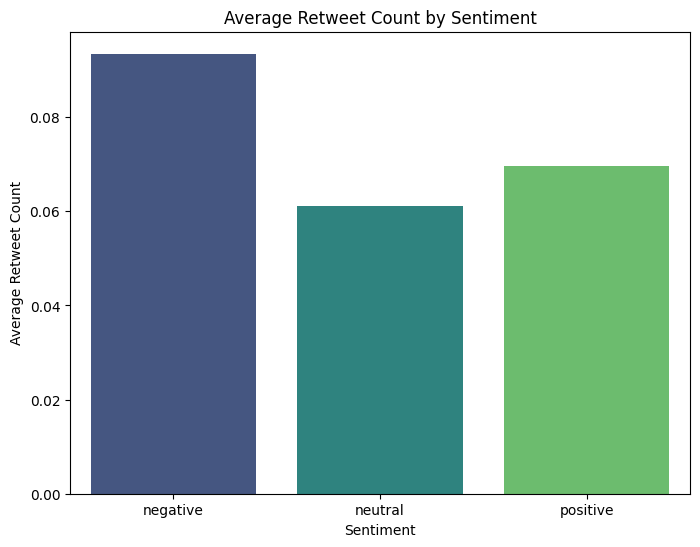

In [ ]:
tweet_retweet_sentiment = df.groupby('airline_sentiment')['retweet_count'].mean().reset_index()
print("\nAverage Retweet Count by Sentiment:")
print(tweet_retweet_sentiment)

plt.figure(figsize=(8, 6))
sns.barplot(x='airline_sentiment', y='retweet_count', data=tweet_retweet_sentiment, palette='viridis')
plt.title('Average Retweet Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Retweet Count')
plt.show()

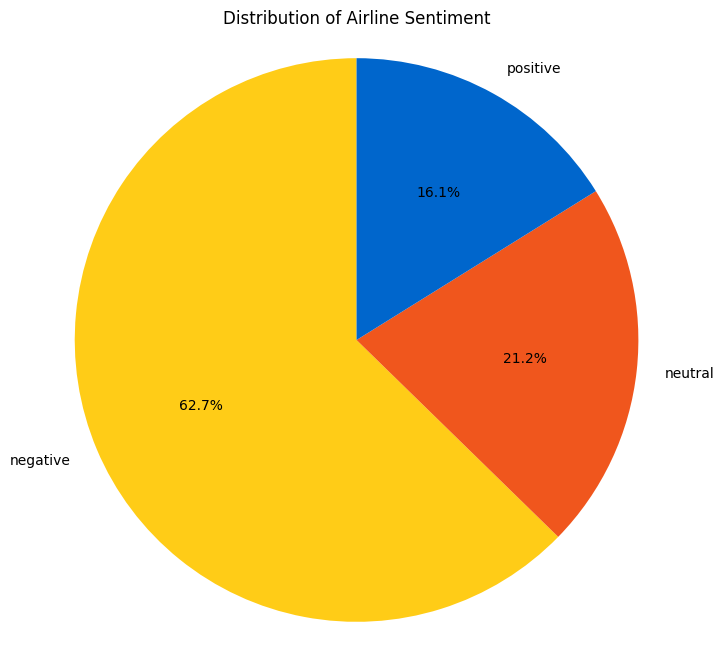

In [383]:
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFCC17', '#F0561D', '#0066CC'])
plt.title('Distribution of Airline Sentiment')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Negative tweets count by day of the week:
day_of_week
Monday       1922
Tuesday      1619
Wednesday     736
Thursday      751
Friday        835
Saturday     1049
Sunday       2266
Name: count, dtype: int64


/tmp/ipython-input-384-1350482819.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_tweets_by_day.index, y=negative_tweets_by_day.values, palette='viridis')


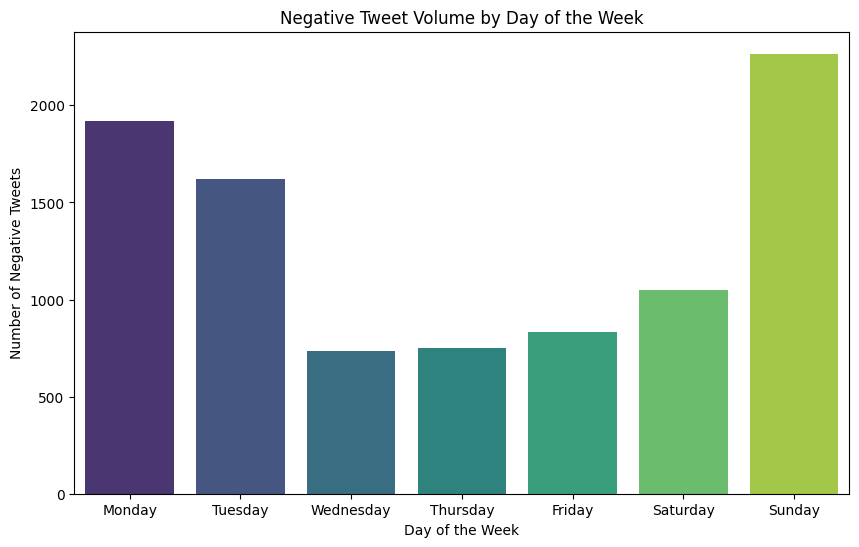


Negative tweets count by hour of the day:
hour_of_day
0      97
1      80
2     109
3     146
4     236
5     313
6     395
7     475
8     556
9     617
10    543
11    572
12    485
13    560
14    585
15    499
16    463
17    451
18    477
19    482
20    389
21    291
22    215
23    142
Name: count, dtype: int64


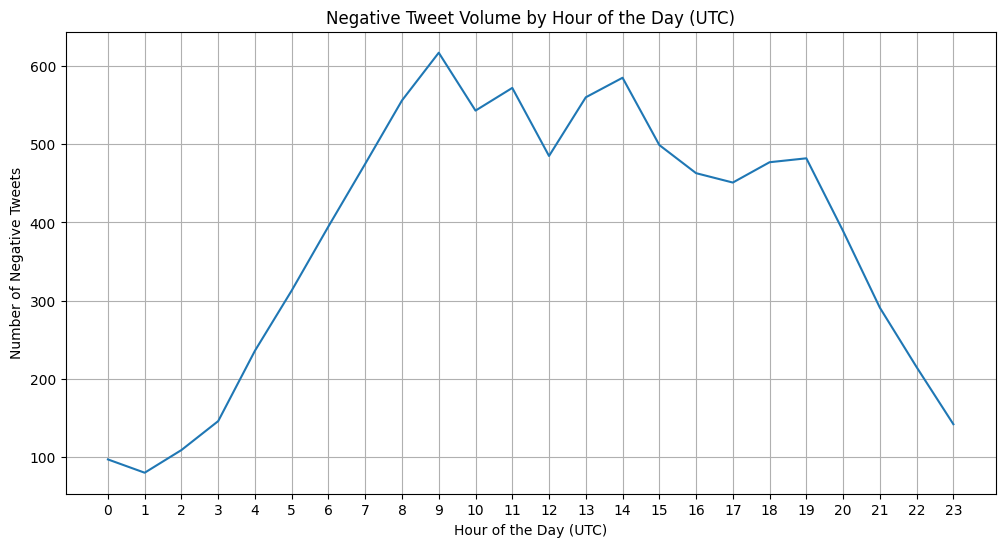


Proportion of negative tweets by day of the week:
day_of_week
Monday       0.633905
Tuesday      0.588299
Wednesday    0.547619
Thursday     0.545785
Friday       0.556667
Saturday     0.673732
Sunday       0.735953
Name: count, dtype: float64


/tmp/ipython-input-384-1350482819.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_proportion_by_day.index, y=negative_proportion_by_day.values, palette='plasma')


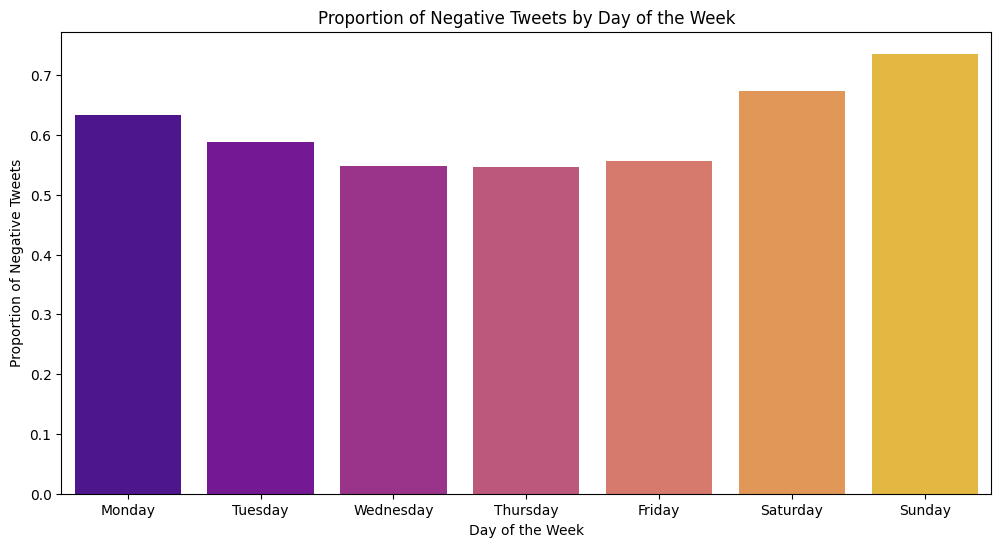


Proportion of negative tweets by hour of the day:
hour_of_day
0     0.740458
1     0.720721
2     0.626437
3     0.648889
4     0.641304
5     0.656184
6     0.636071
7     0.612113
8     0.600432
9     0.609082
10    0.564449
11    0.580122
12    0.588592
13    0.622222
14    0.631068
15    0.633249
16    0.630790
17    0.598143
18    0.635153
19    0.714074
20    0.646179
21    0.676744
22    0.736301
23    0.735751
Name: count, dtype: float64


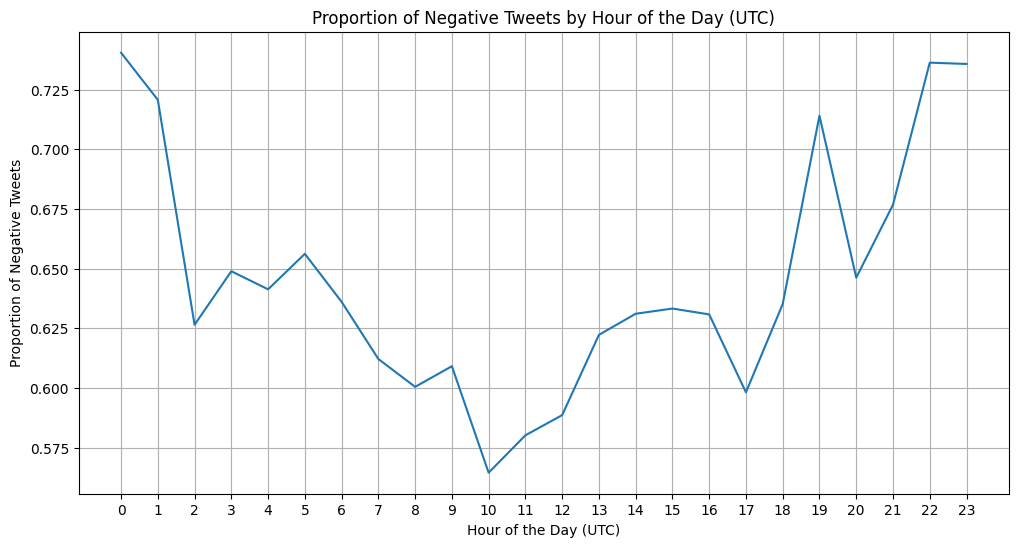

In [384]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
negative_tweets_time = df[df['airline_sentiment'] == 'negative'].copy()

# Analyze negative tweets by day of the week
negative_tweets_time['day_of_week'] = negative_tweets_time['tweet_created'].dt.day_name()
negative_tweets_by_day = negative_tweets_time['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\nNegative tweets count by day of the week:")
print(negative_tweets_by_day)

plt.figure(figsize=(10, 6))
sns.barplot(x=negative_tweets_by_day.index, y=negative_tweets_by_day.values, palette='viridis')
plt.title('Negative Tweet Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Negative Tweets')
plt.show()

# Analyze negative tweets by hour of the day (using the hour in UTC as the original data seems to be UTC)
negative_tweets_time['hour_of_day'] = negative_tweets_time['tweet_created'].dt.hour
negative_tweets_by_hour = negative_tweets_time['hour_of_day'].value_counts().sort_index()

print("\nNegative tweets count by hour of the day:")
print(negative_tweets_by_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(x=negative_tweets_by_hour.index, y=negative_tweets_by_hour.values)
plt.title('Negative Tweet Volume by Hour of the Day (UTC)')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Number of Negative Tweets')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# To see if the _proportion_ of negative tweets changes by time, calculating total tweets by time period as well
all_tweets_time = df.copy()
all_tweets_time['day_of_week'] = all_tweets_time['tweet_created'].dt.day_name()
all_tweets_by_day = all_tweets_time['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

all_tweets_time['hour_of_day'] = all_tweets_time['tweet_created'].dt.hour
all_tweets_by_hour = all_tweets_time['hour_of_day'].value_counts().sort_index()

negative_proportion_by_day = (negative_tweets_by_day / all_tweets_by_day).dropna()
print("\nProportion of negative tweets by day of the week:")
print(negative_proportion_by_day)

plt.figure(figsize=(12, 6))
sns.barplot(x=negative_proportion_by_day.index, y=negative_proportion_by_day.values, palette='plasma')
plt.title('Proportion of Negative Tweets by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Negative Tweets')
plt.show()

negative_proportion_by_hour = (negative_tweets_by_hour / all_tweets_by_hour).dropna()

print("\nProportion of negative tweets by hour of the day:")
print(negative_proportion_by_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(x=negative_proportion_by_hour.index, y=negative_proportion_by_hour.values)
plt.title('Proportion of Negative Tweets by Hour of the Day (UTC)')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Proportion of Negative Tweets')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Hypothesis Testing**

1. Customer Loyalty & Retention

What are the most frequently cited negativereasons across all airlines?


In [ ]:
# prompt: Null Hypothesis (H0): The frequency of negativereasons is uniformly distributed across all possible negative reasons.
# Alternative Hypothesis (H1): The frequency of negativereasons is not uniformly distributed, with certain reasons being cited significantly more often than others.

from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# Chi-Squared Test for Uniform Distribution of Negative Reasons
observed_frequencies = df['negativereason'].value_counts()
observed_table = pd.DataFrame({'observed': observed_frequencies}).T
total_negative_reasons = observed_frequencies.sum()
num_unique_reasons = len(observed_frequencies)

expected_frequency_per_reason = total_negative_reasons / num_unique_reasons
expected_frequencies = np.full(num_unique_reasons, expected_frequency_per_reason)

chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)


print("\nChi-Squared Test for Uniform Distribution of Negative Reasons")
print(f"Observed Frequencies:\n{observed_frequencies}")
print(f"Expected Frequency (under H0): {expected_frequency_per_reason:.2f} for each reason")
print('\n')
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
  print(f"\nConclusion: With a p-value of {p_value:.4f} (less than alpha={alpha}), we reject the null hypothesis.")
  print("There is sufficient evidence to suggest that the frequency of negative reasons is not uniformly distributed.")
else:
  print(f"\nConclusion: With a p-value of {p_value:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis.")
  print("There is not enough evidence to suggest that the frequency of negative reasons is not uniformly distributed. The observed distribution is consistent with a uniform distribution.")


Chi-Squared Test for Uniform Distribution of Negative Reasons
Observed Frequencies:
negativereason
Others                         5445
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64
Expected Frequency (under H0): 1327.64 for each reason


Chi-squared statistic: 18814.2109
P-value: 0.0000

Conclusion: With a p-value of 0.0000 (less than alpha=0.05), we reject the null hypothesis.
There is sufficient evidence to suggest that the frequency of negative reasons is not uniformly distributed.


Which airlines receive the highest proportion of negative sentiment tweets, and which receive the most positive?

In [ ]:
# prompt: Null Hypothesis (H0): There is no significant difference in the proportion of negative (or positive) sentiment tweets across different airlines.
# Alternative Hypothesis (H1): There is a significant difference in the proportion of negative (or positive) sentiment tweets among different airlines.

contingency_table = pd.crosstab(df['airline'], df['airline_sentiment'])
print("\nContingency Table (Airline vs. Sentiment):")
print(contingency_table)

# Perform the Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Squared Test for Independence (Airline vs. Sentiment)")
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05  # Significance level
if p_value < alpha:
  print(f"\nConclusion: With a p-value of {p_value:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
  print("There is sufficient evidence to suggest that there is a significant difference in the proportion of sentiment tweets across different airlines.")
else:
  print(f"\nConclusion: With a p-value of {p_value:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
  print("There is not enough evidence to suggest a significant difference in the proportion of sentiment tweets across different airlines. The observed distribution is consistent with independence between airline and sentiment.")


Contingency Table (Airline vs. Sentiment):
airline_sentiment  negative  neutral  positive
airline                                       
American               1941      455       327
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

Chi-Squared Test for Independence (Airline vs. Sentiment)
Chi-squared statistic: 1158.2455
P-value: 0.0000
Degrees of Freedom: 10

Conclusion: With a p-value of 0.0000 (less than alpha=0.05), we reject the null hypothesis (H0).
There is sufficient evidence to suggest that there is a significant difference in the proportion of sentiment tweets across different airlines.


Is there a correlation between the airline_sentiment_confidence and the likelihood of a tweet being negative?


In [ ]:
# Null Hypothesis (H0): There is no statistical correlation between airline_sentiment_confidence and the likelihood of a tweet being negative.
# Alternative Hypothesis (H1): There is a statistical correlation between airline_sentiment_confidence and the likelihood of a tweet being negative.
from scipy.stats import pearsonr
correlation, p_value_correlation = pearsonr(df['airline_sentiment_confidence'], df['is_negative'])

print("\nFormal Test for Correlation between Airline Sentiment Confidence and Likelihood of being Negative")
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value for the correlation test: {p_value_correlation:.4f}")

alpha = 0.05
if p_value_correlation < alpha:
  print(f"\nConclusion: With a p-value of {p_value_correlation:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
  print("There is sufficient evidence to suggest a statistically significant correlation between airline_sentiment_confidence and the likelihood of a tweet being negative.")
else:
  print(f"\nConclusion: With a p-value of {p_value_correlation:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
  print("There is not enough evidence to suggest a statistically significant correlation between airline_sentiment_confidence and the likelihood of a tweet being negative.")

if abs(correlation) >= 0.5:
    strength = "strong"
elif abs(correlation) >= 0.3:
    strength = "moderate"
elif abs(correlation) >= 0.1:
    strength = "weak"
else:
    strength = "very weak or no"

direction = "positive" if correlation > 0 else "negative" if correlation < 0 else "no"
print(f"The correlation coefficient ({correlation:.4f}) indicates a {strength} {direction} linear relationship.")



Formal Test for Correlation between Airline Sentiment Confidence and Likelihood of being Negative
Pearson correlation coefficient: 0.2651
P-value for the correlation test: 0.0000

Conclusion: With a p-value of 0.0000 (less than alpha=0.05), we reject the null hypothesis (H0).
There is sufficient evidence to suggest a statistically significant correlation between airline_sentiment_confidence and the likelihood of a tweet being negative.
The correlation coefficient (0.2651) indicates a weak positive linear relationship.


2. Demographic & Geographic Analysis

Are there specific tweet_locations or user_timezones that show a higher concentration of negative or positive sentiment tweets for particular airlines?


In [ ]:
# Null Hypothesis (H0): The distribution of sentiment (negative/positive) for a given airline is independent of tweet_location and user_timezone.
# Alternative Hypothesis (H1): The distribution of sentiment (negative/positive) for a given airline is dependent on tweet_location or user_timezone, indicating a higher concentration of specific sentiments in certain areas/timezones.

min_combined_tweets = 100
for airline_name in df['airline'].unique():
  print(f"\nTesting for {airline_name}")
  airline_df = df[df['airline'] == airline_name].copy()
  airline_df['location_timezone'] = airline_df['tweet_location'] + ' | ' + airline_df['user_timezone']
  contingency_table_combined = pd.crosstab(airline_df['location_timezone'], airline_df['airline_sentiment'])
  contingency_table_filtered = contingency_table_combined[contingency_table_combined.sum(axis=1) >= min_combined_tweets]

  if not contingency_table_filtered.empty and contingency_table_filtered.shape[0] > 1 and contingency_table_filtered.shape[1] > 1:

    print(f"\nPerforming Chi-Squared test for {airline_name} (filtered for location-timezone combinations with >= {min_combined_tweets} tweets)")
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

    print(f"Chi-squared statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")

    alpha = 0.05
    if p_value < alpha:
      print(f"\nConclusion for {airline_name}: With a p-value of {p_value:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
      print(f"There is sufficient evidence to suggest that the distribution of sentiment for {airline_name} is dependent on tweet_location or user_timezone.")
    else:
      print(f"\nConclusion for {airline_name}: With a p-value of {p_value:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
      print(f"There is not enough evidence to suggest that the distribution of sentiment for {airline_name} is dependent on tweet_location or user_timezone. The observed distribution is consistent with independence.")

  else:
    print(f"\nNot enough data for {airline_name} to perform a reliable Chi-Squared test on the combined location/timezone and sentiment relationship with the applied filter.")
    print(f"Filtered table shape: {contingency_table_filtered.shape}")


Testing for Virgin America

Not enough data for Virgin America to perform a reliable Chi-Squared test on the combined location/timezone and sentiment relationship with the applied filter.
Filtered table shape: (0, 3)

Testing for United

Performing Chi-Squared test for United (filtered for location-timezone combinations with >= 100 tweets)
Chi-squared statistic: 4.3698
P-value: 0.1125
Degrees of Freedom: 2

Conclusion for United: With a p-value of 0.1125 (greater than or equal to alpha=0.05), we fail to reject the null hypothesis (H0).
There is not enough evidence to suggest that the distribution of sentiment for United is dependent on tweet_location or user_timezone. The observed distribution is consistent with independence.

Testing for Southwest

Performing Chi-Squared test for Southwest (filtered for location-timezone combinations with >= 100 tweets)
Chi-squared statistic: 1.2328
P-value: 0.5399
Degrees of Freedom: 2

Conclusion for Southwest: With a p-value of 0.5399 (greater tha

Do the common negativereasons vary significantly by geographic region or user timezone?


In [ ]:
# Null Hypothesis (H0): The distribution of sentiment (negative/positive) for a given airline is independent of tweet_location and user_timezone.
# Alternative Hypothesis (H1): The distribution of sentiment (negative/positive) for a given airline is dependent on tweet_location or user_timezone, indicating a higher concentration of specific sentiments in certain areas/timezones.

negative_df = df[df['airline_sentiment'] == 'negative'].copy()
min_timezone_negative_tweets = 50
min_negativereason_count = 20

timezone_reason_contingency = pd.crosstab(negative_df['user_timezone'], negative_df['negativereason'])
timezone_reason_contingency_filtered_tz = timezone_reason_contingency[timezone_reason_contingency.sum(axis=1) >= min_timezone_negative_tweets]

timezone_reason_contingency_filtered = timezone_reason_contingency_filtered_tz.loc[:, timezone_reason_contingency_filtered_tz.sum(axis=0) >= min_negativereason_count]

print("\nContingency Table (User Timezone vs. Negative Reason - filtered):")
print(timezone_reason_contingency_filtered.head()) # Print head as the table can be large

if not timezone_reason_contingency_filtered.empty and timezone_reason_contingency_filtered.shape[0] > 1 and timezone_reason_contingency_filtered.shape[1] > 1:
  print("\nPerforming Chi-Squared Test for Independence (User Timezone vs. Negative Reason)")
  chi2_stat, p_value, dof, expected = chi2_contingency(timezone_reason_contingency_filtered)

  print(f"Chi-squared statistic: {chi2_stat:.4f}")
  print(f"P-value: {p_value:.4f}")
  print(f"Degrees of Freedom: {dof}")

  alpha = 0.05
  if p_value < alpha:
    print(f"\nConclusion: With a p-value of {p_value:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
    print("There is sufficient evidence to suggest that the distribution of common negative reasons varies significantly by user_timezone.")
  else:
    print(f"\nConclusion: With a p-value of {p_value:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
    print("There is not enough evidence to suggest that the distribution of common negative reasons varies significantly by user_timezone. The observed distribution is consistent with independence.")

else:
  print("\nNot enough data in the filtered contingency table (User Timezone vs. Negative Reason) to perform a reliable Chi-Squared test.")
  print(f"Filtered table shape: {timezone_reason_contingency_filtered.shape}")



Contingency Table (User Timezone vs. Negative Reason - filtered):
negativereason              Bad Flight  Can't Tell  Cancelled Flight  \
user_timezone                                                          
Alaska                               0          12                 9   
Arizona                             16          19                 8   
Atlantic Time (Canada)              16          32                29   
Central Time (US & Canada)          72         137               139   
Eastern Time (US & Canada)         138         290               224   

negativereason              Customer Service Issue  Damaged Luggage  \
user_timezone                                                         
Alaska                                          30                0   
Arizona                                         43                1   
Atlantic Time (Canada)                          92                1   
Central Time (US & Canada)                     390                7   
Ea

Which airlines demonstrate stronger or weaker sentiment performance in specific geographic areas?

In [ ]:
min_location_tweets = 50

print("\nTesting Sentiment Performance across Geographic Areas (Tweet Location) for each Airline")

for airline_name in df['airline'].unique():
  print(f"\nAnalyzing Sentiment Performance for {airline_name} across Tweet Locations:")
  airline_df = df[df['airline'] == airline_name].copy()
  location_sentiment_contingency = pd.crosstab(airline_df['tweet_location'], airline_df['airline_sentiment'])
  location_sentiment_contingency_filtered = location_sentiment_contingency[location_sentiment_contingency.sum(axis=1) >= min_location_tweets]
  if not location_sentiment_contingency_filtered.empty and location_sentiment_contingency_filtered.shape[0] > 1 and location_sentiment_contingency_filtered.shape[1] > 1:

    print(f"Performing Chi-Squared test for {airline_name} (filtered for locations with >= {min_location_tweets} tweets)")
    chi2_stat, p_value, dof, expected = chi2_contingency(location_sentiment_contingency_filtered)

    print(f"Chi-squared statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")

    alpha = 0.05
    if p_value < alpha:
      print(f"\nConclusion for {airline_name}: With a p-value of {p_value:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
      print(f"There is sufficient evidence to suggest that the sentiment performance for {airline_name} varies significantly across different tweet_locations.")
    else:
      print(f"\nConclusion for {airline_name}: With a p-value of {p_value:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
      print(f"There is not enough evidence to suggest a significant variation in sentiment performance for {airline_name} across different tweet_locations. The observed distribution is consistent with sentiment performance being independent of location.")

  else:
    print(f"Not enough data for {airline_name} in the filtered contingency table (Tweet Location vs. Sentiment) to perform a reliable Chi-Squared test.")
    print(f"Filtered table shape: {location_sentiment_contingency_filtered.shape}")


Testing Sentiment Performance across Geographic Areas (Tweet Location) for each Airline

Analyzing Sentiment Performance for Virgin America across Tweet Locations:
Not enough data for Virgin America in the filtered contingency table (Tweet Location vs. Sentiment) to perform a reliable Chi-Squared test.
Filtered table shape: (1, 3)

Analyzing Sentiment Performance for United across Tweet Locations:
Not enough data for United in the filtered contingency table (Tweet Location vs. Sentiment) to perform a reliable Chi-Squared test.
Filtered table shape: (1, 3)

Analyzing Sentiment Performance for Southwest across Tweet Locations:
Not enough data for Southwest in the filtered contingency table (Tweet Location vs. Sentiment) to perform a reliable Chi-Squared test.
Filtered table shape: (1, 3)

Analyzing Sentiment Performance for Delta across Tweet Locations:
Performing Chi-Squared test for Delta (filtered for locations with >= 50 tweets)
Chi-squared statistic: 121.7511
P-value: 0.0000
Degree

How does the volume of tweets and the sentiment distribution differ across various user_timezones?


In [ ]:
min_tweets_for_chi2 = 100
timezone_sentiment_contingency = pd.crosstab(df['user_timezone'], df['airline_sentiment'])
timezone_sentiment_contingency_filtered = timezone_sentiment_contingency[timezone_sentiment_contingency.sum(axis=1) >= min_tweets_for_chi2]
print("\nContingency Table (User Timezone vs. Sentiment - filtered for timezones with >= {} tweets):".format(min_tweets_for_chi2))
print(timezone_sentiment_contingency_filtered.head())

# Performing the Chi-Squared Test for Independence
if not timezone_sentiment_contingency_filtered.empty and timezone_sentiment_contingency_filtered.shape[0] > 1 and timezone_sentiment_contingency_filtered.shape[1] > 1:
  chi2_stat_sentiment, p_value_sentiment, dof_sentiment, expected_sentiment = chi2_contingency(timezone_sentiment_contingency_filtered)

  print("\nChi-Squared Test for Independence (User Timezone vs. Sentiment Distribution)")
  print(f"Chi-squared statistic: {chi2_stat_sentiment:.4f}")
  print(f"P-value: {p_value_sentiment:.4f}")
  print(f"Degrees of Freedom: {dof_sentiment}")

  alpha = 0.05
  if p_value_sentiment < alpha:
    print(f"\nConclusion: With a p-value of {p_value_sentiment:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
    print("There is sufficient evidence to suggest that the sentiment distribution differs significantly across user timezones.")
  else:
    print(f"\nConclusion: With a p-value of {p_value_sentiment:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
    print("There is not enough evidence to suggest a significant difference in sentiment distribution across user timezones. The observed distribution is consistent with sentiment distribution being independent of timezone.")

else:
  print("\nNot enough data in the filtered contingency table (User Timezone vs. Sentiment) to perform a reliable Chi-Squared test.")
  print(f"Filtered table shape: {timezone_sentiment_contingency_filtered.shape}")

# Test 2: Chi-Squared Test for Uniform Distribution of Tweet Volume across Timezones (considering only significant timezones)
timezone_tweet_volume_filtered = timezone_sentiment_contingency_filtered.sum(axis=1)

if not timezone_tweet_volume_filtered.empty and len(timezone_tweet_volume_filtered) > 1:
  observed_tweet_volumes = timezone_tweet_volume_filtered.values
  total_volume_filtered = observed_tweet_volumes.sum()
  num_timezones_filtered = len(observed_tweet_volumes)
  expected_volume_per_timezone = total_volume_filtered / num_timezones_filtered
  expected_tweet_volumes = np.full(num_timezones_filtered, expected_volume_per_timezone)

  # Perform the Chi-Squared Test for Uniformity
  chi2_stat_volume, p_value_volume = chisquare(f_obs=observed_tweet_volumes, f_exp=expected_tweet_volumes)

  print("\nChi-Squared Test for Uniform Distribution of Tweet Volume across Filtered User Timezones")
  print(f"Observed Tweet Volumes:\n{timezone_tweet_volume_filtered.head()}") # Print head as this can be long
  print(f"Expected Tweet Volume (under H0): {expected_volume_per_timezone:.2f} for each timezone")
  print('\n')
  print(f"Chi-squared statistic: {chi2_stat_volume:.4f}")
  print(f"P-value: {p_value_volume:.4f}")

  alpha = 0.05
  if p_value_volume < alpha:
    print(f"\nConclusion: With a p-value of {p_value_volume:.4f} (less than alpha={alpha}), we reject the null hypothesis.")
    print("There is sufficient evidence to suggest that the tweet volume is not uniformly distributed across the filtered user timezones.")
  else:
    print(f"\nConclusion: With a p-value of {p_value_volume:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that the tweet volume is not uniformly distributed across the filtered user timezones. The observed distribution is consistent with a uniform distribution.")

else:
    print("\nNot enough data in the filtered list of timezones to perform a reliable Chi-Squared test for uniform volume.")
    print(f"Number of filtered timezones: {len(timezone_tweet_volume_filtered)}")

print("\nOverall Hypothesis Test Conclusion (Timezone vs. Tweet Volume and Sentiment)")
alpha = 0.05
if p_value_sentiment < alpha or p_value_volume < alpha:
    print("Based on the Chi-Squared tests for sentiment distribution and tweet volume, we reject the Null Hypothesis (H0).")
    print("There is significant evidence to suggest that the volume of tweets and/or the sentiment distribution differ across user_timezones.")
else:
    print("Based on the Chi-Squared tests, we fail to reject the Null Hypothesis (H0).")
    print("There is not enough evidence to suggest that the volume of tweets or the sentiment distribution differ significantly across user_timezones.")



Contingency Table (User Timezone vs. Sentiment - filtered for timezones with >= 100 tweets):
airline_sentiment           negative  neutral  positive
user_timezone                                          
Alaska                            73       18        17
Arizona                          134       57        37
Atlantic Time (Canada)           299      119        78
Central Time (US & Canada)      1188      380       355
Eastern Time (US & Canada)      2310      769       659

Chi-Squared Test for Independence (User Timezone vs. Sentiment Distribution)
Chi-squared statistic: 287.9421
P-value: 0.0000
Degrees of Freedom: 22

Conclusion: With a p-value of 0.0000 (less than alpha=0.05), we reject the null hypothesis (H0).
There is sufficient evidence to suggest that the sentiment distribution differs significantly across user timezones.

Chi-Squared Test for Uniform Distribution of Tweet Volume across Filtered User Timezones
Observed Tweet Volumes:
user_timezone
Alaska                

3. Program Effectiveness & Customer Behavior

How does the retweet_count differ for tweets with positive, neutral, and negative sentiments?

In [ ]:
# Null Hypothesis (H0): There is no significant difference in the mean retweet_count among tweets with positive, neutral, and negative sentiments.
# Alternative Hypothesis (H1): There is a significant difference in the mean retweet_count among tweets with positive, neutral, and negative sentiments.

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

model = ols('retweet_count ~ C(airline_sentiment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 for unbalanced data
print("\nANOVA Test for Retweet Count by Sentiment:")
print(anova_table)

alpha = 0.05
p_value_anova = anova_table['PR(>F)'][0]
if p_value_anova < alpha:
  print(f"\nConclusion: With a p-value of {p_value_anova:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
  print("There is sufficient evidence to suggest that there is a significant difference in the mean retweet_count among tweets with positive, neutral, and negative sentiments.")

  # Perform Tukey's HSD post-hoc test to see which pairs of sentiments differ
  print("\nPerforming Tukey's HSD Post-Hoc Test:")
  tukey_result = pairwise_tukeyhsd(endog=df['retweet_count'], groups=df['airline_sentiment'], alpha=alpha)
  print(tukey_result)
  print("\nInterpretation of Tukey's HSD:")
  print("The 'reject' column indicates if the difference between the means of the two groups (group1 vs group2) is statistically significant (True means significant difference).")

else:
  print(f"\nConclusion: With a p-value of {p_value_anova:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
  print("There is not enough evidence to suggest a significant difference in the mean retweet_count among tweets with positive, neutral, and negative sentiments.")

correlation_hour_retweet, p_value_hour_retweet = pearsonr(df['tweet_created'].dt.hour, df['retweet_count'])

print("\nPearson Correlation between Hour of Day (UTC) and Retweet Count")
print(f"Correlation coefficient: {correlation_hour_retweet:.4f}")
print(f"P-value: {p_value_hour_retweet:.4f}")

alpha = 0.05
if p_value_hour_retweet < alpha:
    print("Conclusion: Significant linear correlation between hour of day and retweet count.")
else:
    print("Conclusion: No significant linear correlation between hour of day and retweet count.")

# For day of the week and retweet count (ANOVA)
if not df.empty:
    df['day_of_week_num'] = df['tweet_created'].dt.dayofweek # Monday=0, Sunday=6
    day_anova_model = ols('retweet_count ~ C(day_of_week_num)', data=df).fit()
    day_anova_table = sm.stats.anova_lm(day_anova_model, typ=2)

    print("\nANOVA Test for Retweet Count by Day of the Week:")
    print(day_anova_table)

    p_value_day_anova = day_anova_table['PR(>F)'][0]

    if p_value_day_anova < alpha:
        print(f"\nConclusion: With a p-value of {p_value_day_anova:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
        print("There is sufficient evidence to suggest that there is a significant difference in the mean retweet_count across different days of the week.")
    else:
        print(f"\nConclusion: With a p-value of {p_value_day_anova:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
        print("There is not enough evidence to suggest a significant difference in the mean retweet_count across different days of the week.")
else:
    print("DataFrame is empty, cannot perform ANOVA by Day of the Week.")

# For timing of tweets and sentiment distribution (Chi-Squared)
# Day of the week vs. Sentiment
contingency_table_day_sentiment = pd.crosstab(df['tweet_created'].dt.day_name(), df['airline_sentiment'])
contingency_table_day_sentiment = contingency_table_day_sentiment.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

if not contingency_table_day_sentiment.empty and contingency_table_day_sentiment.shape[0] > 1 and contingency_table_day_sentiment.shape[1] > 1:
    chi2_stat_day_sentiment, p_value_day_sentiment, dof_day_sentiment, expected_day_sentiment = chi2_contingency(contingency_table_day_sentiment)

    print("\nChi-Squared Test for Independence (Day of Week vs. Sentiment)")
    print(f"Chi-squared statistic: {chi2_stat_day_sentiment:.4f}")
    print(f"P-value: {p_value_day_sentiment:.4f}")
    print(f"Degrees of Freedom: {dof_day_sentiment}")

    alpha = 0.05
    if p_value_day_sentiment < alpha:
        print(f"\nConclusion: With a p-value of {p_value_day_sentiment:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
        print("There is sufficient evidence to suggest that the sentiment distribution differs significantly across different days of the week.")
    else:
        print(f"\nConclusion: With a p-value of {p_value_day_sentiment:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
        print("There is not enough evidence to suggest a significant difference in sentiment distribution across different days of the week.")
else:
    print("Not enough data in the contingency table (Day of Week vs. Sentiment) to perform a reliable Chi-Squared test.")
    print(f"Table shape: {contingency_table_day_sentiment.shape}")


# Hour of the day vs. Sentiment
contingency_table_hour_sentiment = pd.crosstab(df['tweet_created'].dt.hour, df['airline_sentiment'])
min_tweets_per_hour = 10
contingency_table_hour_sentiment_filtered = contingency_table_hour_sentiment[contingency_table_hour_sentiment.sum(axis=1) >= min_tweets_per_hour]


if not contingency_table_hour_sentiment_filtered.empty and contingency_table_hour_sentiment_filtered.shape[0] > 1 and contingency_table_hour_sentiment_filtered.shape[1] > 1:
    chi2_stat_hour_sentiment, p_value_hour_sentiment, dof_hour_sentiment, expected_hour_sentiment = chi2_contingency(contingency_table_hour_sentiment_filtered)

    print("\nChi-Squared Test for Independence (Hour of Day vs. Sentiment - filtered)")
    print(f"Chi-squared statistic: {chi2_stat_hour_sentiment:.4f}")
    print(f"P-value: {p_value_hour_sentiment:.4f}")
    print(f"Degrees of Freedom: {dof_hour_sentiment}")

    alpha = 0.05
    if p_value_hour_sentiment < alpha:
        print(f"\nConclusion: With a p-value of {p_value_hour_sentiment:.4f} (less than alpha={alpha}), we reject the null hypothesis (H0).")
        print("There is sufficient evidence to suggest that the sentiment distribution differs significantly across different hours of the day.")
    else:
        print(f"\nConclusion: With a p-value of {p_value_hour_sentiment:.4f} (greater than or equal to alpha={alpha}), we fail to reject the null hypothesis (H0).")
        print("There is not enough evidence to suggest a significant difference in sentiment distribution across different hours of the day.")
else:
    print("\nNot enough data in the filtered contingency table (Hour of Day vs. Sentiment) to perform a reliable Chi-Squared test.")
    print(f"Filtered table shape: {contingency_table_hour_sentiment_filtered.shape}")



ANOVA Test for Retweet Count by Sentiment:
                           sum_sq       df        F   PR(>F)
C(airline_sentiment)     2.896144      2.0  2.59809  0.07445
Residual              8138.016140  14601.0      NaN      NaN

Conclusion: With a p-value of 0.0744 (greater than or equal to alpha=0.05), we fail to reject the null hypothesis (H0).
There is not enough evidence to suggest a significant difference in the mean retweet_count among tweets with positive, neutral, and negative sentiments.

Pearson Correlation between Hour of Day (UTC) and Retweet Count
Correlation coefficient: 0.0284
P-value: 0.0006
Conclusion: Significant linear correlation between hour of day and retweet count.

ANOVA Test for Retweet Count by Day of the Week:
                         sum_sq       df         F    PR(>F)
C(day_of_week_num)     6.074517      6.0  1.816666  0.091599
Residual            8134.837768  14597.0       NaN       NaN

Conclusion: With a p-value of 0.0916 (greater than or equal to alpha=0

/tmp/ipython-input-352-1552320797.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_anova = anova_table['PR(>F)'][0]
/tmp/ipython-input-352-1552320797.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_day_anova = day_anova_table['PR(>F)'][0]


Are there specific days or times (tweet_created) when negative sentiment tweets are more prevalent, suggesting periods of heightened customer frustration?

In [ ]:
# Null Hypothesis (H0): The proportion of negative sentiment tweets is consistent across different days of the week and times of the day.
# Alternative Hypothesis (H1): The proportion of negative sentiment tweets is significantly higher on certain days of the week or during specific times of the day.

print("\nOverall Hypothesis Test Conclusion (Timing of Negative Sentiment)")
alpha = 0.05
if p_value_day_sentiment < alpha or p_value_hour_sentiment < alpha:
    print("Based on the Chi-Squared tests, we reject the Null Hypothesis (H0).")
    print("There is sufficient evidence to suggest that the proportion of negative sentiment tweets varies significantly across different days of the week and/or times of the day.")
    print("This supports the Alternative Hypothesis (H1) that negative sentiment is significantly higher on certain days or times.")
else:
    print("Based on the Chi-Squared tests, we fail to reject the Null Hypothesis (H0).")
    print("There is not enough evidence to suggest that the proportion of negative sentiment tweets varies significantly across different days of the week or times of the day.")
    print("The observed distribution is consistent with the Null Hypothesis (H0) that the proportion is consistent.")


Overall Hypothesis Test Conclusion (Timing of Negative Sentiment)
Based on the Chi-Squared tests, we reject the Null Hypothesis (H0).
There is sufficient evidence to suggest that the proportion of negative sentiment tweets varies significantly across different days of the week and/or times of the day.
This supports the Alternative Hypothesis (H1) that negative sentiment is significantly higher on certain days or times.


# Insights

Based on the analysis of the provided code, here are some insights that can be gained about customer behavior from their Twitter interactions with airlines:

**Overall Sentiment and Key Drivers:**

*   **General Sentiment Distribution:** The analysis starts by looking at the overall sentiment distribution across airlines. This shows which airlines have a higher proportion of positive or negative feedback. For example, `most_positive_airline` and `most_negative_airline` identify the airlines with the highest and lowest positive sentiment, respectively.
*   **Primary Drivers of Negative Sentiment:** The bar plot of `negativereason` clearly highlights the most common reasons for negative tweets (e.g., Customer Service Issues, Late Flight, Cancelled Flight). This directly reveals the pain points customers experience.
*   **Confidence in Sentiment:** The correlation and mean confidence by sentiment analysis suggests that negative tweets tend to be expressed with higher confidence. This implies that customers are often very sure about their negative experiences and are likely to voice them strongly.
*   **Keywords and Themes:** The TF-IDF analysis of tweet text for different sentiments (positive, neutral, negative) reveals the specific language and topics associated with each.
    *   **Positive Tweets:** Likely contain words and phrases related to good service, helpful staff, positive flight experiences, etc.
    *   **Negative Tweets:** Will highlight terms related to delays, cancellations, poor service, baggage issues, etc. Analyzing TF-IDF for specific `negativereason` categories (like 'Customer Service Issue' or 'Late Flight') would reveal even more granular insights into the language used when describing those specific problems.

**Geographic and Demographic Variations:**

*   **Location-Based Sentiment:** Analyzing sentiment distribution by `tweet_location` (filtered for locations with sufficient tweet volume) shows if certain geographic areas have more positive or negative sentiment. This could indicate regional service differences, the impact of specific airports, or demographics in those areas.
*   **Timezone-Based Sentiment:** Similar to locations, examining sentiment by `user_timezone` can reveal patterns. Timezones with a higher proportion of negative tweets might indicate issues related to flight schedules across different time zones, support availability during certain hours, or customer demographics in those regions.
*   **Negative Reasons by Location/Timezone:** Digging deeper into `negativereason` by location and timezone shows if certain problems are more prevalent in specific areas or timezones. For example, "Weather Delay" might be more common in certain regions or seasons.

**Engagement and Timing of Interactions:**

*   **Retweet Count and Sentiment:** The analysis of `retweet_count` by sentiment provides insight into which types of tweets are shared more widely. Negative tweets often have higher retweet counts, indicating that customers are more likely to amplify negative experiences, which is a key aspect of customer behavior on social media.
*   **Timing of Negative Tweets:** The analysis of negative tweets by `day_of_week` and `hour_of_day` reveals when customers are most likely to tweet negatively. Peaks in negative tweets could correspond to:
    *   Busy travel days or times (e.g., weekends, peak travel hours).
    *   Times when support response might be slower.
    *   Specific events like flight disruptions. Analyzing the *proportion* of negative tweets by time provides a more normalized view, showing when a higher percentage of tweets are negative, regardless of overall tweet volume.

**Program Effectiveness and Response:**

*   **Identification of Pain Points:** By analyzing the `negativereason` distribution and the keywords in negative tweets, airlines can directly identify the most pressing issues affecting customer satisfaction.
*   **Targeting Interventions:** Geographic and temporal analysis allows airlines to target their efforts (e.g., improving service at specific airports, increasing support staff during certain hours) to address customer issues more effectively.
*   **Understanding Customer Language:** Analyzing the language used in different sentiment categories helps airlines understand how customers express their feelings and the specific terms they use to describe their experiences. This can inform communication strategies and the language used in automated responses or support interactions.
*   **Measuring Impact of Changes:** By tracking sentiment and negative reasons over time, airlines can measure the effectiveness of operational changes, customer service improvements, or communication campaigns.

In summary, by analyzing the content and context of customer interactions on Twitter (text, mentions, location, time), airlines can gain valuable insights into:

*   What makes customers happy or unhappy.
*   Where and when customers are most likely to express negative sentiment.
*   The specific issues causing customer dissatisfaction.
*   How customer behavior (like sharing negative experiences) impacts the airline's online reputation.

These insights are crucial for improving service, addressing pain points, and ultimately enhancing customer loyalty and retention.

# Recommendations

**1. Recommendations for Customer Loyalty & Retention:**

- Prioritize Addressing Top Negative Reasons: Focus resources on resolving the  most frequently cited negative reasons (e.g., "Late Flight," "Customer Service Issue," "Cancelled Flight"). Quantify the financial or reputational impact of these issues to prioritize effectively.

- Highlight Positive Aspects: Identify and amplify the specific factors that drive positive sentiment. Use these as marketing strengths if certain aspects of in-flight service or booking experience consistently receive positive feedback.

- Monitor Sentiment Confidence: Investigate tweets with low airline_sentiment_confidence, especially negative ones, to understand why the sentiment is ambiguous. This could indicate nuanced issues or sarcasm that require more sophisticated sentiment analysis or manual review.

**2. Recommendations for Demographic & Geographic Analysis:**

- Tailor Regional Strategies: If certain user_timezones or tweet_locations show a disproportionately high concentration of negative sentiment, investigate local operational issues, ground staff training, or specific regional challenges. Conversely, replicate best practices from areas with high positive sentiment.

- Localize Communication: Adjust communication strategies based on negativereasons prevalent in specific geographic regions or timezones. For example, if "Lost Luggage" is a major issue in a particular region, ensure local communication channels and staff are well-equipped to handle such inquiries.

- Identify Underperforming/Outperforming Regions: Pinpoint specific geographic areas where an airline performs significantly weaker or stronger in terms of sentiment. Use this information for targeted service improvements or marketing campaigns.

**3. Recommendations for Program Effectiveness & Customer Behavior:**

- Negative Tweets with High Retweet Counts: Prioritize immediate public and private responses to mitigate further damage. Analyze their content to identify root causes needing urgent attention.

- Positive Tweets with High Retweet Counts: Actively engage with these users, retweet their positive feedback, and potentially use their testimonials in marketing efforts to amplify positive brand messaging.

- Optimize Staffing and Operations for Peak Frustration Times: If the analysis reveals specific days or hours with a higher prevalence of negative sentiment tweets, consider adjusting customer service staffing levels, technical support availability, or operational procedures during these "peak frustration" periods.

- Proactive Communication during Peak Negative Times: During periods identified with heightened negative sentiment, consider proactive communication strategies (e.g., automated updates on potential delays, tips for common issues) to manage customer expectations and reduce the volume of negative tweets.